In [181]:
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine
from joblib import Parallel, delayed
import disease_network_funs as fun_py
from importlib import reload
from itertools import chain

from sqlalchemy.dialects.mysql import DOUBLE
from sqlalchemy.types import Integer, String, Text
import warnings
from sqlalchemy.exc import OperationalError
from sqlalchemy import text

import os
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor
import logging
import pickle
import multiprocessing as mp
from multiprocessing import Pool
from functools import partial
import gc
from importlib import reload
import pyreadstat
import disease_network_funs as fun_py
import re

import pickle

In [ ]:
# pip install requests
import requests
import time
from xml.etree import ElementTree

  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [requests]2/5 [charset_normalizer]
Note: you may need to restart the kernel to use updated packages.


In [47]:
reload(fun_py)

<module 'disease_network_funs' from '/home/hashjamm/codes/disease_network/disease_network_funs.py'>

In [1]:
sas_path = "/home/hashjamm/project_data/disease_network/sas_files/"
edge_pids_path = "/home/hashjamm/results/disease_network/edge_pids/"
matched_path = "/home/hashjamm/project_data/disease_network/sas_files/matched/"
ctable_path = "/home/hashjamm/results/disease_network/ctables/"
pids_info_path = "/home/hashjamm/results/disease_network/"
final_results_path = "/home/hashjamm/results/disease_network/final_results/"
network_path = "/home/hashjamm/results/disease_network/default_network_properties/"
db_migration_path = "/home/hashjamm/results/disease_network/db_migration/"
subgrouping_info_path = "/home/hashjamm/codes/disease_network/"

In [ ]:
# stat_cut_result_1~10.csv 를 바탕으로 그냥 edge_stat을 만들 수가 있을 듯함
# edge_pids_info_1~10.csv 를 바탕으로 그냥 edge_attr을 만들 수가 있을 듯함
# node_base와 node_attr은 node_pids_info에서 이미 충실하게 모든 정보가 포함되어있음. 최적화까지 진행할 이유는 크지 않음

In [ ]:
# node 쪽부터 - 기존과 동일하게 진행

In [3]:
node_info = pd.read_csv(f'{pids_info_path}node_pids_info.csv')

In [4]:
node_info

,node_code,width,height,sex_1_counts,sex_2_counts,age_0_counts,age_1_counts,age_2_counts,age_3_counts,age_4_counts,...,sex_2_ctrb_3_counts,sex_2_ctrb_4_counts,sex_2_ctrb_5_counts,sex_2_ctrb_6_counts,sex_2_ctrb_7_counts,sex_2_ctrb_8_counts,sex_2_ctrb_9_counts,sex_2_ctrb_10_counts,Korean,English
0,J03,1.000000,1.000000,41118,51040,1227,7231,11844,7787,5556,...,3706,4041,4719,5337,6200,6945,6932,6680,급성 편도염,Acute tonsillitis
1,J20,0.999158,0.999158,33557,44137,1392,7547,8334,5408,3702,...,3076,3551,4110,4759,5237,6008,5889,5823,급성 기관지염,Acute bronchitis
2,J06,0.998315,0.998315,30228,39585,1318,7861,7637,4603,3452,...,2858,3271,3662,4201,4824,5166,5258,5252,다발성 및 상세불명 부위의 급성 상기도 감염,Acute upper respiratory infections of muitiple...
3,J02,0.997473,0.997473,27607,36329,1561,7785,7644,4575,3204,...,2446,2923,3262,3855,4456,4892,5164,4934,급성 인두염,Acute pharyngitis
4,J00,0.996630,0.996630,27512,35232,1308,7750,6915,4203,3031,...,2525,2972,3344,3615,4196,4626,4698,4474,급성 비인두염[감기],Acute nasopharyngitis[common cold]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,T37,0.014322,0.167650,8,2,0,0,0,0,0,...,0,0,0,0,0,1,0,1,기타 전신성 항감염제 및 항기생충제에 의한 중독,Poisoning by other systemic antiinfectives and...
1183,T54,0.038753,0.109520,5,5,0,0,1,0,0,...,0,1,0,0,1,0,2,0,부식물질의 독작용,Toxic effect of corrosive substances
1184,T75,0.014322,0.167650,8,2,0,0,2,0,1,...,0,0,1,0,1,0,0,0,기타 외인의 영향,Effects of other extenal causes
1185,T94,0.076664,0.085088,3,7,0,1,0,3,0,...,2,0,1,0,1,0,0,0,다발성 및 상세불명의 신체 부위를 침범한 손상의 후유증,Sequelae of injuries involving mulitple and un...


In [5]:
node_base = node_info[['node_code', 'width', 'height', 'Korean', 'English']]

In [6]:
node_base

,node_code,width,height,Korean,English
0,J03,1.000000,1.000000,급성 편도염,Acute tonsillitis
1,J20,0.999158,0.999158,급성 기관지염,Acute bronchitis
2,J06,0.998315,0.998315,다발성 및 상세불명 부위의 급성 상기도 감염,Acute upper respiratory infections of muitiple...
3,J02,0.997473,0.997473,급성 인두염,Acute pharyngitis
4,J00,0.996630,0.996630,급성 비인두염[감기],Acute nasopharyngitis[common cold]
...,...,...,...,...,...
1182,T37,0.014322,0.167650,기타 전신성 항감염제 및 항기생충제에 의한 중독,Poisoning by other systemic antiinfectives and...
1183,T54,0.038753,0.109520,부식물질의 독작용,Toxic effect of corrosive substances
1184,T75,0.014322,0.167650,기타 외인의 영향,Effects of other extenal causes
1185,T94,0.076664,0.085088,다발성 및 상세불명의 신체 부위를 침범한 손상의 후유증,Sequelae of injuries involving mulitple and un...


In [7]:
node_attr = fun_py.melting_node_attr(node_info)

In [8]:
node_attr

,node_code,attribute_1,value_1,attribute_2,value_2,count
0,J03,sex,1,None,None,41118
1,J20,sex,1,None,None,33557
2,J06,sex,1,None,None,30228
3,J02,sex,1,None,None,27607
4,J00,sex,1,None,None,27512
...,...,...,...,...,...,...
124536,K45,sex,2,ctrb,10,1
124537,L12,sex,2,ctrb,10,1
124538,Q64,sex,2,ctrb,10,1
124539,R72,sex,2,ctrb,10,1


In [9]:
node_base.to_csv(f'{db_migration_path}node_base.csv', index = False)
node_attr.to_csv(f'{db_migration_path}node_attr.csv', index = False)

In [ ]:
# edge 쪽 진행

In [4]:
for i in range(1, 11):
    stat_cut_result = pd.read_csv(f'{ctable_path}stat_cut_result_{i}.csv')
    cis_cut_final_result = stat_cut_result[stat_cut_result['rr_lower_cis'] > 1]

    cis_cut_final_result.to_csv(f"{final_results_path}DBver_cis_cut_final_result_{i}.csv", index=False)

In [3]:
num_files = 10
edge_stats_raw = []

for fu in range(1, num_files + 1):
    file_path = f'{final_results_path}DBver_cis_cut_final_result_{fu}.csv'
    edge_stat = pd.read_csv(file_path)
    edge_stat['fu'] = fu
    # 'fu' 컬럼을 맨 앞으로 재정렬
    edge_stat = edge_stat[['fu'] + [col for col in edge_stat.columns if col != 'fu']]
    edge_stats_raw.append(edge_stat)

# 모든 stat 결과를 하나로 합치기
whole_edge_stat = pd.concat(edge_stats_raw, ignore_index=True)

In [5]:
# 각 코어(프로세스)에서 실행될 작업 함수 정의
def process_attr_file(task):
    """파일 경로를 받아 데이터를 읽고, 변환 함수를 호출한 후 DataFrame을 반환"""
    # 기존 방식: 메인 프로세스가 무거운 짐(실제 데이터)을 모두 짊어진 후, 그 짐을 다시 다른 코어에게 나눠주는 방식. (메모리 오버로드 발생)
    # 개선된 방식: 메인 프로세스는 가벼운 지시서(파일 경로)만 나눠주고, 각 코어가 지시서를 받아 스스로 무거운 짐(실제 데이터)을 처리하는 방식. (메모리 오버로드 방지)
    # 근데 파일 경로 방식으로 바꿔도 마찬가지임 그냥..
    
    fu, file_path = task
    edge_attr = pd.read_csv(file_path)
    
    transformed_attr = fun_py.DBver_transform_edge_attr((fu, edge_attr))
    return transformed_attr

# 처리할 작업 목록(파일 경로) 생성
attr_tasks = [
    (fu, f'{pids_info_path}edge_pids_info_{fu}.csv')
    for fu in range(1, num_files + 1)
]

In [6]:
edge_attrs_final_1 = Parallel(n_jobs=3)(
    delayed(process_attr_file)(task) for task in attr_tasks[:3]
)

In [7]:
edge_attrs_final_2 = Parallel(n_jobs=3)(
    delayed(process_attr_file)(task) for task in attr_tasks[3:6]
)

In [8]:
edge_attrs_final_3 = Parallel(n_jobs=2)(
    delayed(process_attr_file)(task) for task in attr_tasks[6:8]
)

In [9]:
edge_attrs_final_4 = Parallel(n_jobs=2)(
    delayed(process_attr_file)(task) for task in attr_tasks[8:]
)

In [10]:
edge_attrs_final = list(chain.from_iterable([
    edge_attrs_final_1,
    edge_attrs_final_2,
    edge_attrs_final_3,
    edge_attrs_final_4
]))

whole_edge_attr = pd.concat(edge_attrs_final, ignore_index=True)

In [11]:
whole_edge_stat.to_csv(f'{db_migration_path}DBver_edge_stat.csv', index = False)
whole_edge_attr.to_csv(f'{db_migration_path}DBver_edge_attr.csv', index = False)

In [10]:
whole_edge_stat = pd.read_csv(f'{db_migration_path}DBver_edge_stat.csv')
whole_edge_attr = pd.read_csv(f'{db_migration_path}DBver_edge_attr.csv')

/tmp/ipykernel_88919/1737892120.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  whole_edge_attr = pd.read_csv(f'{db_migration_path}DBver_edge_attr.csv')


In [ ]:
# 기존 데이터와 비교

In [19]:
old_edge_stat = pd.read_csv(f'{db_migration_path}edge_stat.csv')
old_edge_attr = pd.read_csv(f'{db_migration_path}edge_attr.csv')

/tmp/ipykernel_88919/2154121846.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  old_edge_attr = pd.read_csv(f'{db_migration_path}edge_attr.csv')


In [17]:
old_edge_stat

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values
0,1,N96,Z34,119,11,7,19,3.400000,1.801018,6.418592,1.481605,54.154286,1.853492e-13,1.662959e-11,4.989345e-12,4.193596e-10
1,1,O21,Z34,1368,162,158,148,1.731646,1.551574,1.932616,1.004904,256.638693,9.272970e-58,2.055706e-47,1.813447e-55,3.613541e-45
2,1,O20,Z34,4388,517,508,473,1.727559,1.625097,1.836481,1.003407,826.735127,8.307710e-182,1.130926e-147,1.065910e-178,1.242073e-144
3,1,O98,Z34,84,6,11,7,1.527273,1.052162,2.216923,0.927141,11.823158,5.849856e-04,1.061854e-03,3.726498e-03,6.625912e-03
4,1,Z33,Z34,111,9,15,9,1.480000,1.081106,2.026073,0.908259,13.828571,2.002676e-04,4.235557e-04,1.467193e-03,3.017219e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734455,10,K58,O73,95293,17,19051,11,1.000399,1.000047,1.000751,0.693347,8.752143,3.092385e-03,3.654377e-03,1.667506e-02,1.962555e-02
734456,10,B37,O73,46328,27,9257,14,1.000929,1.000107,1.001752,0.693612,7.810635,5.193965e-03,5.536740e-03,2.580218e-02,2.762878e-02
734457,10,A09,G35,143297,8,28654,7,1.000188,1.000003,1.000374,0.693241,7.680670,5.581544e-03,6.601191e-03,2.737484e-02,3.183133e-02
734458,10,Z34,P59,45789,21,9146,16,1.001290,1.000411,1.002170,0.693792,16.962768,3.812007e-05,1.297095e-04,3.385088e-04,1.072318e-03


In [32]:
old_edge_stat['cause_abb'].nunique()

1073

In [33]:
old_edge_stat['outcome_abb'].nunique()

1115

In [39]:
len(set(old_edge_stat['cause_abb'].tolist() + old_edge_stat['outcome_abb'].tolist()))

1151

In [35]:
old_edge_stat.drop_duplicates(subset = ['cause_abb', 'outcome_abb'])

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values
0,1,N96,Z34,119,11,7,19,3.400000,1.801018,6.418592,1.481605,54.154286,1.853492e-13,1.662959e-11,4.989345e-12,4.193596e-10
1,1,O21,Z34,1368,162,158,148,1.731646,1.551574,1.932616,1.004904,256.638693,9.272970e-58,2.055706e-47,1.813447e-55,3.613541e-45
2,1,O20,Z34,4388,517,508,473,1.727559,1.625097,1.836481,1.003407,826.735127,8.307710e-182,1.130926e-147,1.065910e-178,1.242073e-144
3,1,O98,Z34,84,6,11,7,1.527273,1.052162,2.216923,0.927141,11.823158,5.849856e-04,1.061854e-03,3.726498e-03,6.625912e-03
4,1,Z33,Z34,111,9,15,9,1.480000,1.081106,2.026073,0.908259,13.828571,2.002676e-04,4.235557e-04,1.467193e-03,3.017219e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734439,10,J01,K67,199779,11,39950,8,1.000145,1.000003,1.000288,0.693220,7.116353,7.638392e-03,7.886192e-03,3.542411e-02,3.669455e-02
734440,10,H60,Z70,93026,19,18598,11,1.000387,1.000026,1.000749,0.693341,7.261951,7.043073e-03,1.094763e-02,3.313554e-02,4.778991e-02
734445,10,N76,O71,132233,77,26436,26,1.000401,1.000001,1.000801,0.693348,4.857520,2.752587e-02,2.420738e-02,9.856732e-02,8.777502e-02
734457,10,A09,G35,143297,8,28654,7,1.000188,1.000003,1.000374,0.693241,7.680670,5.581544e-03,6.601191e-03,2.737484e-02,3.183133e-02


In [93]:
reload(fun_py)

<module 'disease_network_funs' from '/home/hashjamm/codes/disease_network/disease_network_funs.py'>

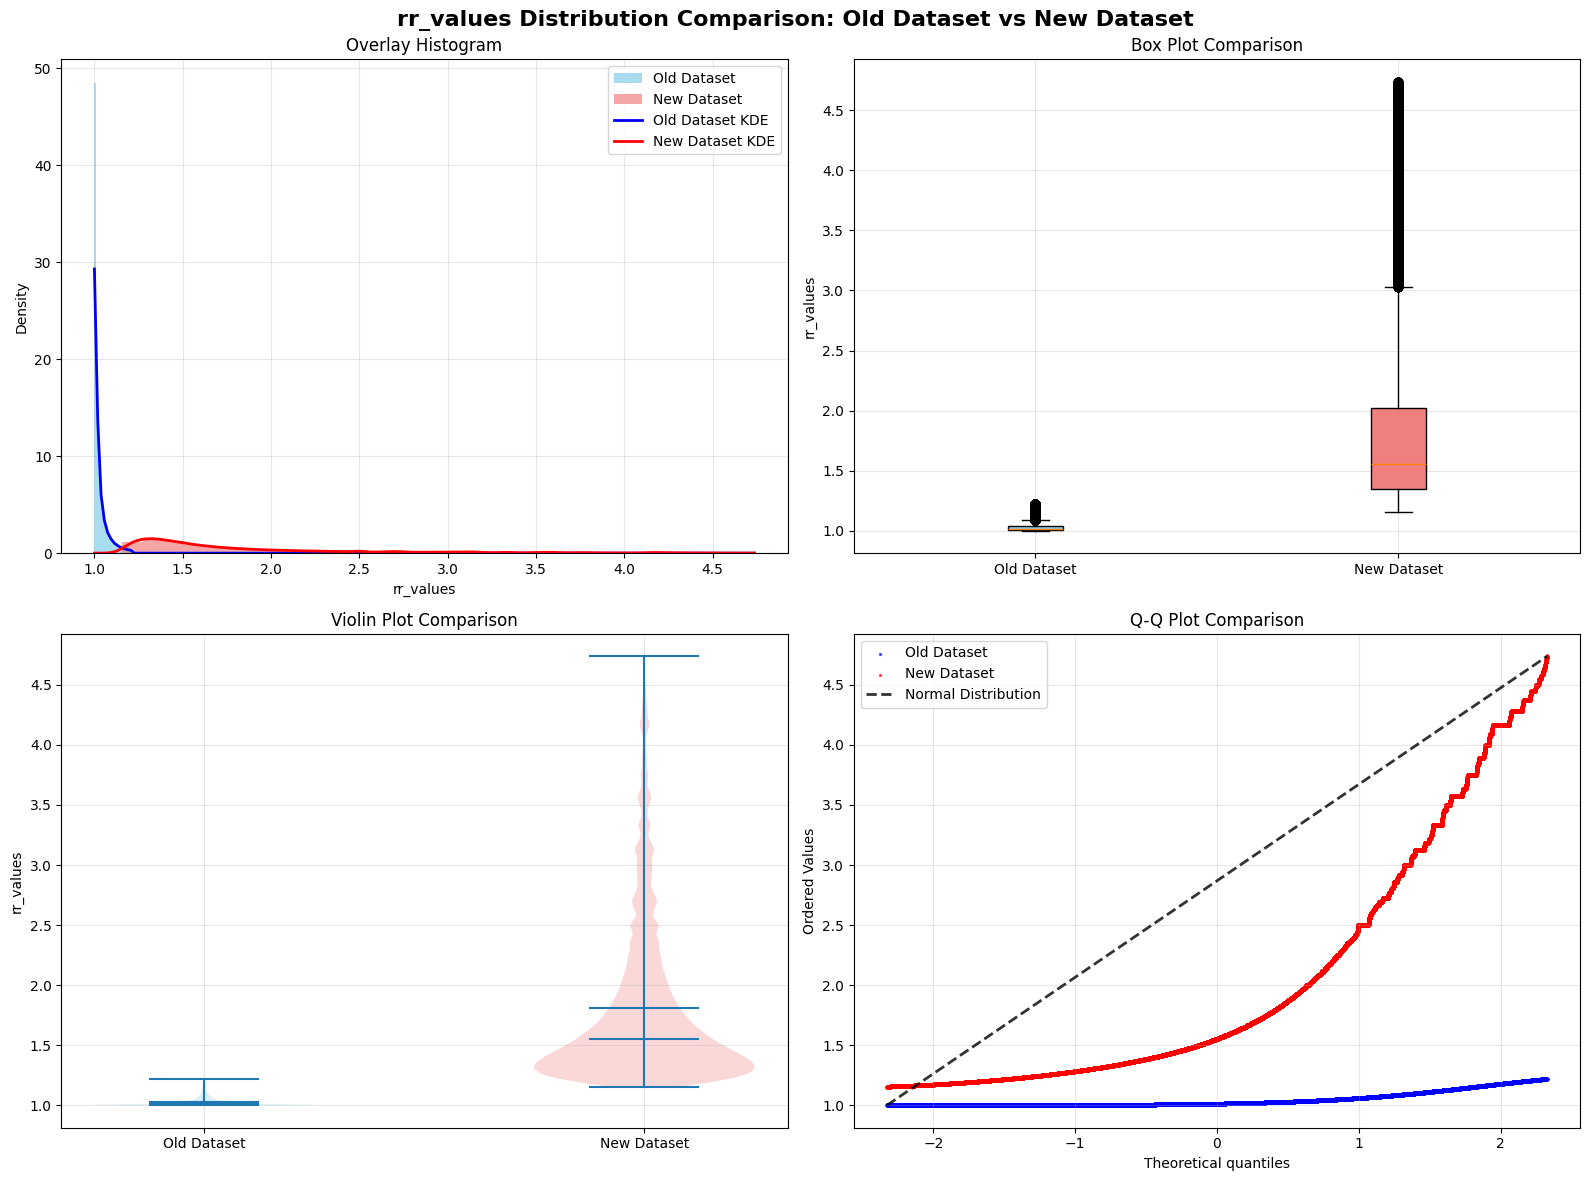

In [84]:
fig =\
fun_py.compare_two_datasets(
    df1=old_edge_stat, 
    df2=whole_edge_stat, 
    column='rr_values',
    name1='Old Dataset',
    name2='New Dataset',
    remove_outliers=True,
    lower_percentile=2.5,
    upper_percentile=97.5,
    normalize=False
)

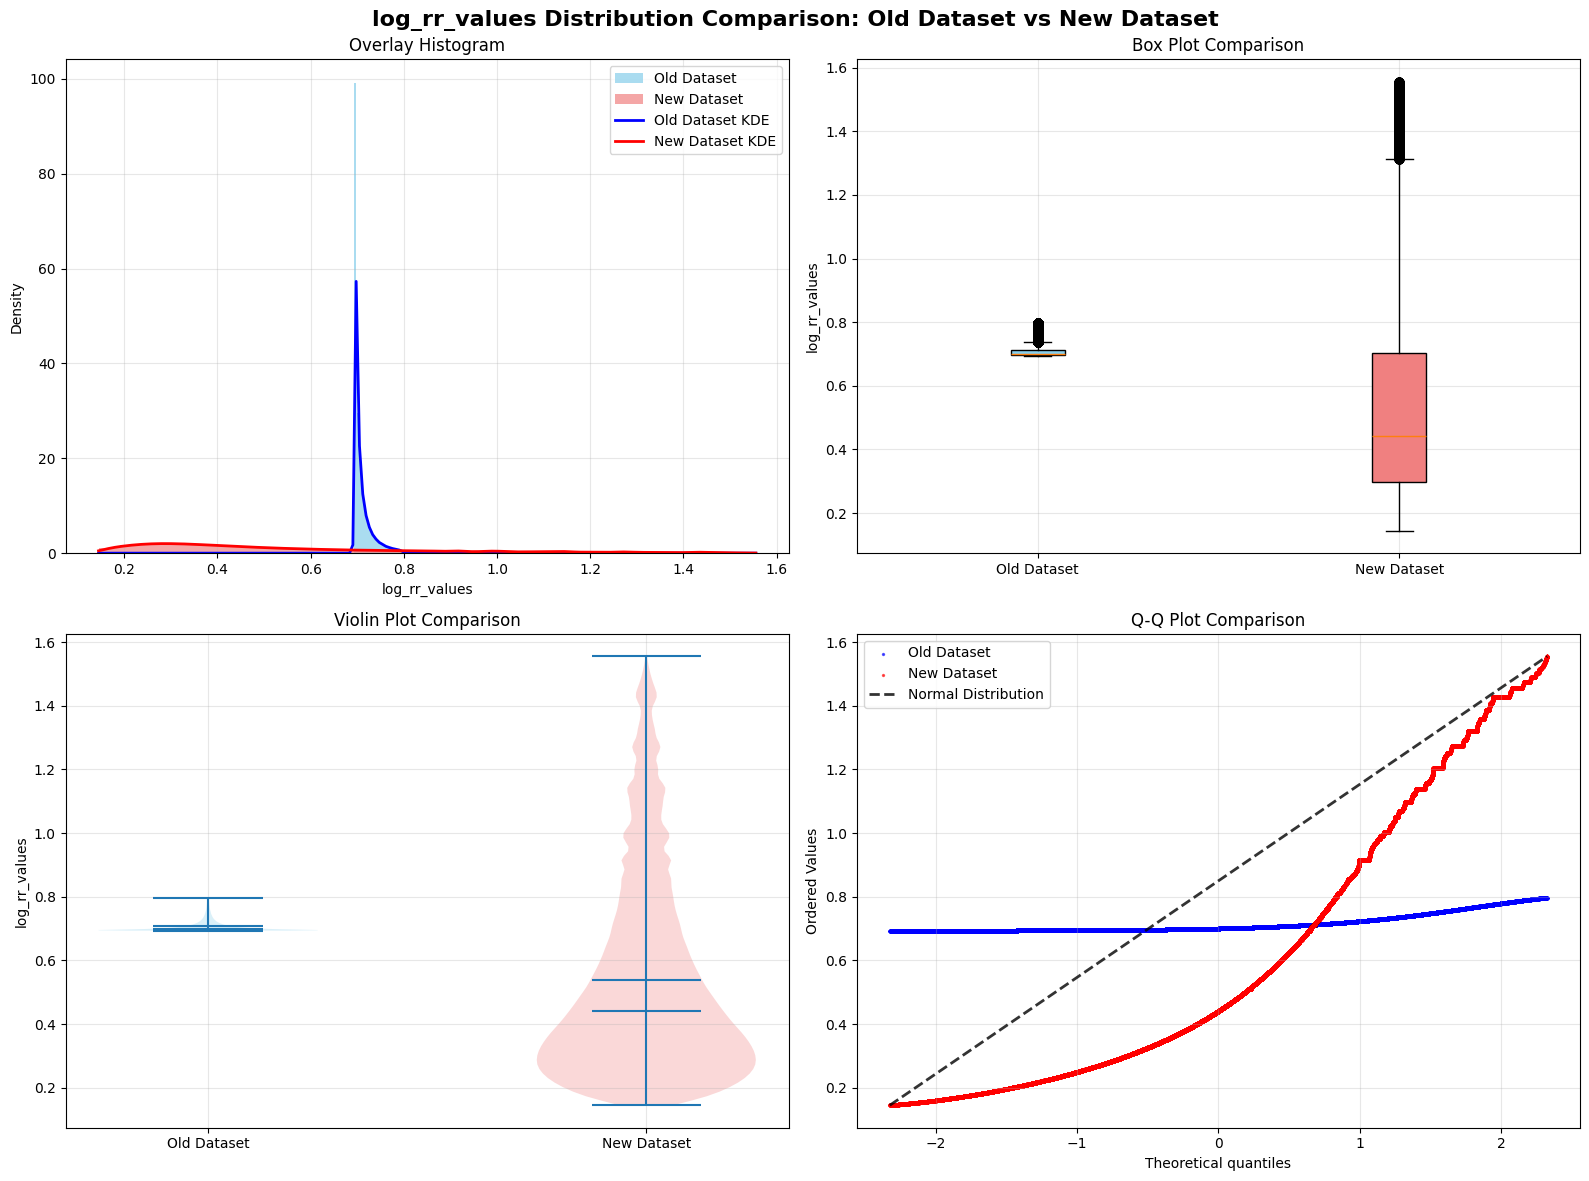

In [85]:
fig =\
fun_py.compare_two_datasets(
    df1=old_edge_stat, 
    df2=whole_edge_stat, 
    column='log_rr_values',
    name1='Old Dataset',
    name2='New Dataset',
    remove_outliers=True,
    lower_percentile=2.5,
    upper_percentile=97.5,
    normalize=False,
)

로그 변환 적용됨: rr_values


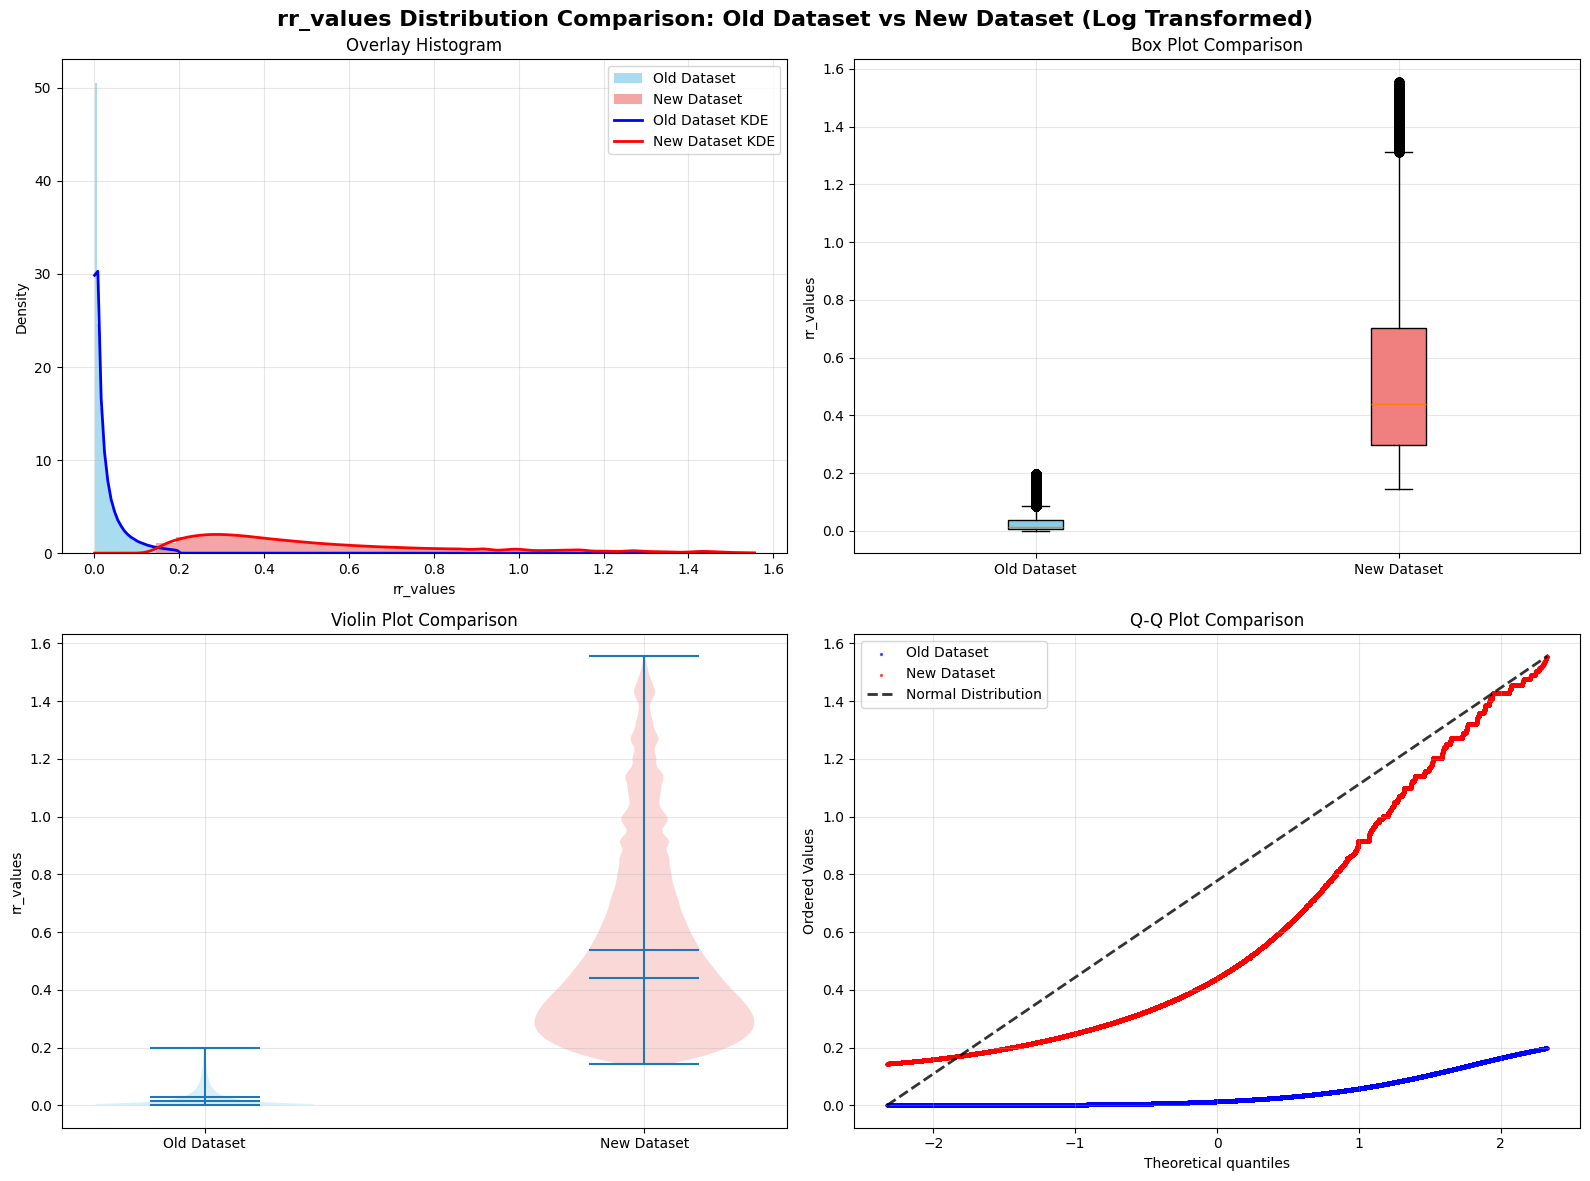

In [94]:
fig =\
fun_py.compare_two_datasets(
    df1=old_edge_stat, 
    df2=whole_edge_stat, 
    column='rr_values',
    name1='Old Dataset',
    name2='New Dataset',
    remove_outliers=True,
    lower_percentile=2.5,
    upper_percentile=97.5,
    normalize=False,
    log_transform=True,
    log_method='log'
)

아웃라이어 제거 적용:
  원본 데이터 포인트: 734,460
  필터링된 데이터 포인트: 697,736
  제거된 데이터: 36,724 (5.0%)
  범위: 2.5% ~ 97.5% (1.0007 ~ 1.2199)


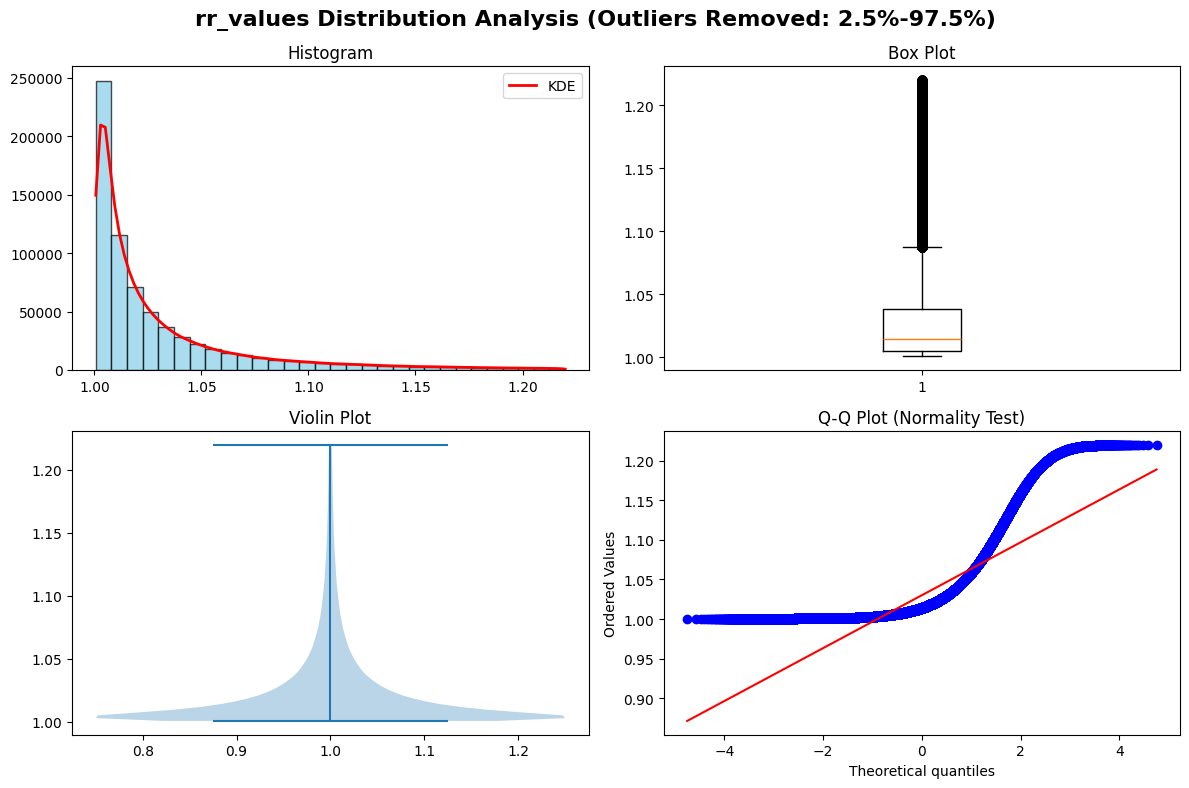


=== rr_values 통계 정보 ===
count    697736.000000
mean          1.030152
std           0.039537
min           1.000674
25%           1.004999
50%           1.014168
75%           1.037886
max           1.219913
Name: rr_values, dtype: float64

정규성 검정:
통계량: 308336.8622, p-value: 0.0000
정규분포 여부: 아니오 (α=0.05)

=== 아웃라이어 정보 ===
원본 범위: 1.0001 ~ 5.1121
필터링된 범위: 1.0007 ~ 1.2199
하위 2.5% 미만 아웃라이어: 35,806
상위 97.5% 초과 아웃라이어: 35,806


In [95]:
fun_py.plot_advanced_histogram(old_edge_stat, remove_outliers = True, plot_type = 'all', column = 'rr_values')

아웃라이어 제거 적용:
  원본 데이터 포인트: 991,885
  필터링된 데이터 포인트: 942,302
  제거된 데이터: 49,583 (5.0%)
  범위: 2.5% ~ 97.5% (1.1558 ~ 4.7368)


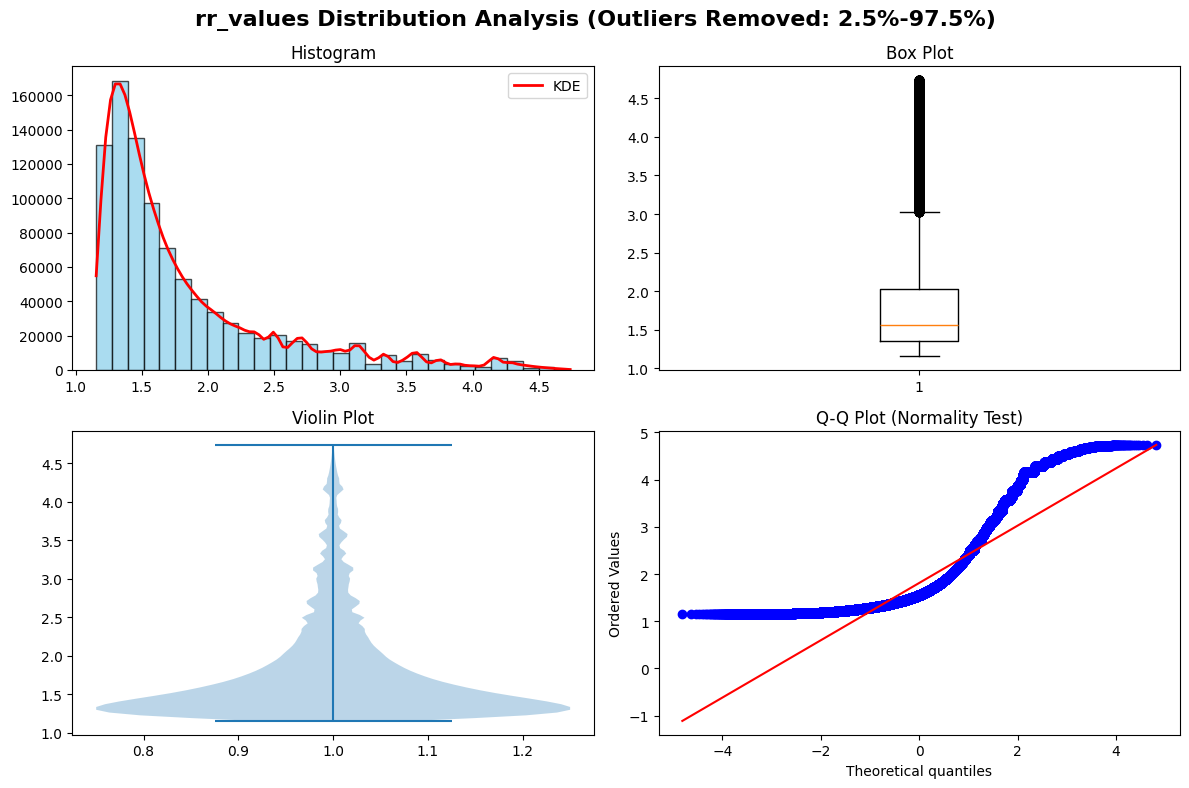


=== rr_values 통계 정보 ===
count    942302.000000
mean          1.812335
std           0.682614
min           1.155811
25%           1.347607
50%           1.554054
75%           2.021277
max           4.736842
Name: rr_values, dtype: float64

정규성 검정:
통계량: 298106.9200, p-value: 0.0000
정규분포 여부: 아니오 (α=0.05)

=== 아웃라이어 정보 ===
원본 범위: 1.0166 ~ 81.0000
필터링된 범위: 1.1558 ~ 4.7368
하위 2.5% 미만 아웃라이어: 48,354
상위 97.5% 초과 아웃라이어: 47,548


In [51]:
fun_py.plot_advanced_histogram(whole_edge_stat, remove_outliers = True, plot_type = 'all', column = 'rr_values')

In [14]:
whole_edge_stat

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values
0,1,A16,A15,7061,9,1280,134,74.444444,37.999309,145.844107,4.310053,3.432395e-137,2.755249e-94,2.692665e-134,1.385547e-91
1,1,K74,C22,4409,6,811,72,60.000000,26.171216,137.555703,4.094345,6.712756e-73,7.373630e-50,1.865508e-70,1.405957e-47
2,1,A15,A16,5072,13,897,120,46.153846,26.145321,81.474520,3.831980,3.292205e-117,3.982694e-80,1.859960e-114,1.584824e-77
3,1,G81,I69,1649,6,284,47,39.166667,16.884047,90.856638,3.667826,3.945854e-46,1.356317e-31,5.305647e-44,1.277106e-29
4,1,C22,K74,2085,10,344,75,37.500000,19.548704,71.935713,3.624341,1.562308e-72,7.987700e-50,4.281068e-70,1.520931e-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991880,10,L22,J20,213,4302,16,887,1.030916,1.019737,1.042217,0.030448,5.911802e-05,1.687369e-05,4.908076e-04,1.670066e-04
991881,10,S01,J06,27259,31166,5262,6423,1.030450,1.011988,1.049248,0.029995,1.308559e-03,1.323614e-03,7.592256e-03,8.305673e-03
991882,10,E11,J00,26183,16702,5138,3439,1.029517,1.000637,1.059231,0.029090,4.644276e-02,4.689152e-02,1.331937e-01,1.419759e-01
991883,10,J03,Z34,423379,37411,84487,7671,1.025233,1.001396,1.049638,0.024920,3.801538e-02,3.842346e-02,1.147021e-01,1.226560e-01


In [96]:
whole_edge_stat['cause_abb'].nunique()

1168

In [97]:
whole_edge_stat['outcome_abb'].nunique()

1170

In [98]:
whole_edge_stat.drop_duplicates(subset = ['cause_abb', 'outcome_abb'])

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values
0,1,A16,A15,7061,9,1280,134,74.444444,37.999309,145.844107,4.310053,3.432395e-137,2.755249e-94,2.692665e-134,1.385547e-91
1,1,K74,C22,4409,6,811,72,60.000000,26.171216,137.555703,4.094345,6.712756e-73,7.373630e-50,1.865508e-70,1.405957e-47
2,1,A15,A16,5072,13,897,120,46.153846,26.145321,81.474520,3.831980,3.292205e-117,3.982694e-80,1.859960e-114,1.584824e-77
3,1,G81,I69,1649,6,284,47,39.166667,16.884047,90.856638,3.667826,3.945854e-46,1.356317e-31,5.305647e-44,1.277106e-29
4,1,C22,K74,2085,10,344,75,37.500000,19.548704,71.935713,3.624341,1.562308e-72,7.987700e-50,4.281068e-70,1.520931e-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991801,10,S01,J21,50088,8337,9924,1761,1.056135,1.007233,1.107412,0.054616,2.437287e-02,2.529297e-02,8.210837e-02,9.062305e-02
991833,10,I11,M79,12682,6273,2474,1317,1.049737,1.000444,1.101459,0.048540,4.975727e-02,5.198123e-02,1.403461e-01,1.521042e-01
991855,10,B01,L23,13159,7936,2562,1657,1.043977,1.001689,1.088049,0.043037,4.316560e-02,4.377386e-02,1.258009e-01,1.350020e-01
991861,10,R50,H52,20084,12561,3910,2619,1.042513,1.009016,1.077121,0.041634,1.326148e-02,1.378283e-02,5.106332e-02,5.734633e-02


In [99]:
len(set(whole_edge_stat['cause_abb'].tolist() + whole_edge_stat['outcome_abb'].tolist()))

1187

In [100]:
old_edge_attr

,fu,cause_abb,outcome_abb,attribute_1,value_1,attribute_2,value_2,count
0,1,J46,J20,sex,1,NaN,NaN,103
1,1,T08,J20,sex,1,NaN,NaN,1
2,1,I13,J20,sex,1,NaN,NaN,42
3,1,I11,J20,sex,1,NaN,NaN,178
4,1,E14,J20,sex,1,NaN,NaN,218
...,...,...,...,...,...,...,...,...
48897304,10,L50,F39,sex,1,age,18.0,1
48897305,10,I10,F39,sex,1,age,18.0,1
48897306,10,R10,K51,sex,1,age,18.0,1
48897307,10,L28,L80,sex,1,age,18.0,1


In [103]:
print(old_edge_attr['cause_abb'].nunique())
print(old_edge_attr['outcome_abb'].nunique())
print(old_edge_attr.drop_duplicates(subset = ['cause_abb', 'outcome_abb']).shape)
print(len(set(old_edge_attr['cause_abb'].tolist() + old_edge_attr['outcome_abb'].tolist())))

1073
1115
(120474, 8)
1151


In [101]:
whole_edge_attr

,fu,cause_abb,outcome_abb,attribute_1,value_1,attribute_2,value_2,count
0,1,J03,J20,sex,1,None,None,9695
1,1,J03,J06,sex,1,None,None,6454
2,1,J03,J02,sex,1,None,None,5795
3,1,J03,J00,sex,1,None,None,4989
4,1,J03,K29,sex,1,None,None,3137
...,...,...,...,...,...,...,...,...
96789404,10,N35,I63,sex,1,age,18,1
96789405,10,N35,S40,sex,1,age,18,1
96789406,10,N35,I64,sex,1,age,18,1
96789407,10,D29,L23,sex,1,age,18,1


In [104]:
print(whole_edge_attr['cause_abb'].nunique())
print(whole_edge_attr['outcome_abb'].nunique())
print(whole_edge_attr.drop_duplicates(subset = ['cause_abb', 'outcome_abb']).shape)
print(len(set(whole_edge_attr['cause_abb'].tolist() + whole_edge_attr['outcome_abb'].tolist())))

1187
1187
(677461, 8)
1187


In [ ]:
# edge_attr에서 왜 기존보다 훨씬 많은 경우가 나온건지 알아봤음.
# 이유는 info_merging_20250617.ipynb 에서 edge_pids_info를 edge_stat 기반의 테이블에 inner joining을 한 테이블을 기반으로
# 해당 테이블을 melting해서 edge_stat과 edge_attr을 만들었었기 때문
# 해당 파일의 아래의 코드 때문
# for i in range(1, 11):
#     edge_pids_info = pd.read_csv(f'{pids_info_path}edge_pids_info_{i}.csv')
#     stat_cut_result = pd.read_csv(f'{ctable_path}stat_cut_result_{i}.csv')
    
#     edge_pids_info = fun_py.colname_type_setting(edge_pids_info, 2, 'edge')
    
#     final_result =\
#     pd.merge(stat_cut_result, edge_pids_info, on=['cause_abb', 'outcome_abb'], how='inner').reset_index(drop=True)
    
#     final_result =\
#     pd.merge(final_result, cause_pids_info, on=['cause_abb'], how='inner').reset_index(drop=True)
    
#     final_result =\
#     pd.merge(final_result, outcome_pids_info, on=['outcome_abb'], how='inner').reset_index(drop=True)
    
#     cis_cut_final_result = final_result[final_result['rr_lower_cis'] > 1]
    
#     final_result.to_csv(f"{final_results_path}final_result_{i}.csv", index=False)
#     cis_cut_final_result.to_csv(f"{final_results_path}cis_cut_final_result_{i}.csv", index=False)

In [16]:
whole_edge_stat

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values
0,1,A16,A15,7061,9,1280,134,74.444444,37.999309,145.844107,4.310053,3.432395e-137,2.755249e-94,2.692665e-134,1.385547e-91
1,1,K74,C22,4409,6,811,72,60.000000,26.171216,137.555703,4.094345,6.712756e-73,7.373630e-50,1.865508e-70,1.405957e-47
2,1,A15,A16,5072,13,897,120,46.153846,26.145321,81.474520,3.831980,3.292205e-117,3.982694e-80,1.859960e-114,1.584824e-77
3,1,G81,I69,1649,6,284,47,39.166667,16.884047,90.856638,3.667826,3.945854e-46,1.356317e-31,5.305647e-44,1.277106e-29
4,1,C22,K74,2085,10,344,75,37.500000,19.548704,71.935713,3.624341,1.562308e-72,7.987700e-50,4.281068e-70,1.520931e-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991880,10,L22,J20,213,4302,16,887,1.030916,1.019737,1.042217,0.030448,5.911802e-05,1.687369e-05,4.908076e-04,1.670066e-04
991881,10,S01,J06,27259,31166,5262,6423,1.030450,1.011988,1.049248,0.029995,1.308559e-03,1.323614e-03,7.592256e-03,8.305673e-03
991882,10,E11,J00,26183,16702,5138,3439,1.029517,1.000637,1.059231,0.029090,4.644276e-02,4.689152e-02,1.331937e-01,1.419759e-01
991883,10,J03,Z34,423379,37411,84487,7671,1.025233,1.001396,1.049638,0.024920,3.801538e-02,3.842346e-02,1.147021e-01,1.226560e-01


In [17]:
whole_edge_attr

,fu,cause_abb,outcome_abb,attribute_1,value_1,attribute_2,value_2,count
0,1,J03,J20,sex,1,NaN,NaN,9695
1,1,J03,J06,sex,1,NaN,NaN,6454
2,1,J03,J02,sex,1,NaN,NaN,5795
3,1,J03,J00,sex,1,NaN,NaN,4989
4,1,J03,K29,sex,1,NaN,NaN,3137
...,...,...,...,...,...,...,...,...
96789404,10,N35,I63,sex,1,age,18.0,1
96789405,10,N35,S40,sex,1,age,18.0,1
96789406,10,N35,I64,sex,1,age,18.0,1
96789407,10,D29,L23,sex,1,age,18.0,1


In [21]:
# whole_edge_attr 데이터 필터링 작업
filtering_combos = whole_edge_stat.drop_duplicates(subset = ['fu', 'cause_abb', 'outcome_abb'])[['fu', 'cause_abb', 'outcome_abb']]

In [22]:
filtering_combos

,fu,cause_abb,outcome_abb
0,1,A16,A15
1,1,K74,C22
2,1,A15,A16
3,1,G81,I69
4,1,C22,K74
...,...,...,...
991880,10,L22,J20
991881,10,S01,J06
991882,10,E11,J00
991883,10,J03,Z34


In [24]:
whole_edge_attr_filtered = whole_edge_attr.merge(filtering_combos, on = ['fu', 'cause_abb', 'outcome_abb'], how = 'inner')
whole_edge_attr_filtered


,fu,cause_abb,outcome_abb,attribute_1,value_1,attribute_2,value_2,count
0,1,J03,J20,sex,1,NaN,NaN,9695
1,1,J03,J06,sex,1,NaN,NaN,6454
2,1,J03,J02,sex,1,NaN,NaN,5795
3,1,J03,J00,sex,1,NaN,NaN,4989
4,1,J03,K29,sex,1,NaN,NaN,3137
...,...,...,...,...,...,...,...,...
54643144,10,I47,I49,sex,1,age,18.0,1
54643145,10,K81,K29,sex,1,age,18.0,1
54643146,10,H83,S33,sex,1,age,18.0,1
54643147,10,H83,K58,sex,1,age,18.0,1


In [26]:
whole_edge_attr_filtered.to_csv(f'{db_migration_path}DBver_edge_attr_filtered.csv', index = False)

In [ ]:
# Supple 테이블 생성
# edge_stat => whole_edge_stat
# edge_attr => whole_edge_attr_filtered

In [8]:
# loading data
supple_info_1 = pd.read_excel(f'{subgrouping_info_path}network_supplement_subgrouping.xlsx', sheet_name='Sheet1')
supple_info_2 = pd.read_excel(f'{subgrouping_info_path}network_supplement_subgrouping.xlsx', sheet_name='Sheet2')

In [123]:
supple_info_1.head()

,group_num,disease_name,related_body_part,related_ingre,grouping_level
0,1,비알코올성 지방간(NAFLD/NASH),간,"오메가-3, 비타민 E, 실리마린",3
1,2,"고LDL콜레스테롤혈증, 고중성지방혈증",간·혈관·혈장 지질,"식물스테롤, 베타-글루칸, 적효모쌀*, 오메가-3(EPA/DHA)",3
2,3,근감소증(노쇠 관련),골격근,"유청단백, 류신, 비타민 D",2
3,4,골관절염,관절(연골),"글루코사민, 콘드로이틴, MSM",3
4,5,류마티스관절염,관절·면역,오메가-3,3


In [124]:
supple_info_2.head()

,code,group_num
0,K75,1
1,K76,1
2,E78,2
3,M62,3
4,M17,4


In [9]:
supple_info = supple_info_2.merge(supple_info_1, how = 'left', on = 'group_num')

In [10]:
supple_info.head()

,code,group_num,disease_name,related_body_part,related_ingre,grouping_level
0,K75,1,비알코올성 지방간(NAFLD/NASH),간,"오메가-3, 비타민 E, 실리마린",3
1,K76,1,비알코올성 지방간(NAFLD/NASH),간,"오메가-3, 비타민 E, 실리마린",3
2,E78,2,"고LDL콜레스테롤혈증, 고중성지방혈증",간·혈관·혈장 지질,"식물스테롤, 베타-글루칸, 적효모쌀*, 오메가-3(EPA/DHA)",3
3,M62,3,근감소증(노쇠 관련),골격근,"유청단백, 류신, 비타민 D",2
4,M17,4,골관절염,관절(연골),"글루코사민, 콘드로이틴, MSM",3


In [11]:
supple_info_2.groupby('code').filter(lambda x: len(x) > 1)


,code,group_num


In [128]:
supple_target_code_list_1 = supple_info['code'].unique().tolist()
supple_target_code_list_2 = supple_info.loc[supple_info['grouping_level'] >= 2]['code'].unique().tolist()
supple_target_code_list_3 = supple_info.loc[supple_info['grouping_level'] >= 3]['code'].unique().tolist()
print(len(supple_target_code_list_1))
print(len(supple_target_code_list_2))
print(len(supple_target_code_list_3))

53
35
20


In [ ]:
def supple_approxi_rr_result_maker(whole_edge_stat, supple_info, min_grouping_level = 1):

    supple_map = supple_info.loc[supple_info['grouping_level'] >= min_grouping_level][['code', 'group_num']]
    supple_approxi_rr_result = whole_edge_stat.loc[(whole_edge_stat['cause_abb'].isin(supple_map['code'])) | (whole_edge_stat['outcome_abb'].isin(supple_map['code']))]

    supple_approxi_rr_result =\
         supple_approxi_rr_result.merge(
            supple_map, how = 'left', left_on = 'cause_abb', right_on = 'code'
            ).merge(
                supple_map, how = 'left', left_on = 'outcome_abb', right_on = 'code', suffixes = ('_cause', '_outcome')
            )

    supple_approxi_rr_result = supple_approxi_rr_result.rename(columns={
        'group_num_cause': 'cause_group_num',
        'group_num_outcome': 'outcome_group_num'
    }).drop(columns=['code_cause', 'code_outcome'])

    target_cols = ['cause_group_num', 'outcome_group_num']

    # NaN 값을 0으로 채우고, 데이터 타입을 int64로 변환
    supple_approxi_rr_result[target_cols] = supple_approxi_rr_result[target_cols].fillna(0).astype('int64')

    return supple_approxi_rr_result

In [ ]:
supple_approxi_rr_result_1 = supple_approxi_rr_result_maker(whole_edge_stat, supple_info)
supple_approxi_rr_result_2 = supple_approxi_rr_result_maker(whole_edge_stat, supple_info, 2)
supple_approxi_rr_result_3 = supple_approxi_rr_result_maker(whole_edge_stat, supple_info, 3)

In [ ]:
print(len(supple_approxi_rr_result_1))
print(len(supple_approxi_rr_result_2))
print(len(supple_approxi_rr_result_3))

273242
192943
114622


In [ ]:
supple_approxi_rr_result_1

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values,cause_group_num,outcome_group_num
0,1,I21,I25,3493,22,586,117,26.590909,16.985578,41.628047,3.280569,1.428845e-104,1.219837e-71,6.955992e-102,4.145182e-69,0,30
1,1,F32,F31,19989,11,3949,51,23.181818,12.093657,44.436245,3.143368,8.829814e-44,1.153120e-29,1.106023e-41,9.887949e-28,13,0
2,1,G47,F51,7141,14,1367,64,22.857143,12.855496,40.640128,3.129264,1.243494e-54,4.404728e-37,2.202750e-52,5.208467e-35,24,0
3,1,F40,F41,1274,6,231,25,20.833333,8.633979,50.269729,3.036554,4.624872e-22,3.612595e-15,2.221573e-20,1.263902e-13,0,12
4,1,F32,F33,19972,28,3886,114,20.357143,13.483103,30.735748,3.013432,1.626922e-92,1.267693e-62,6.511721e-90,3.405778e-60,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273237,10,E11,J03,23796,19089,4621,3956,1.036199,1.010417,1.062638,0.035559,6.154736e-03,6.229207e-03,2.765560e-02,3.040270e-02,38,0
273238,10,S01,J30,32314,26111,6286,5399,1.033855,1.011821,1.056370,0.033295,2.686467e-03,2.746212e-03,1.397601e-02,1.546421e-02,0,21
273239,10,E11,K29,20090,22795,3871,4706,1.032244,1.010640,1.054309,0.031735,3.674665e-03,3.674939e-03,1.815034e-02,1.972259e-02,38,0
273240,10,S01,J06,27259,31166,5262,6423,1.030450,1.011988,1.049248,0.029995,1.308559e-03,1.323614e-03,7.592256e-03,8.305673e-03,0,23


In [ ]:
supple_approxi_rr_result_2

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values,cause_group_num,outcome_group_num
0,1,F32,F31,19989,11,3949,51,23.181818,12.093657,44.436245,3.143368,8.829814e-44,1.153120e-29,1.106023e-41,9.887949e-28,13,0
1,1,G47,F51,7141,14,1367,64,22.857143,12.855496,40.640128,3.129264,1.243494e-54,4.404728e-37,2.202750e-52,5.208467e-35,24,0
2,1,F40,F41,1274,6,231,25,20.833333,8.633979,50.269729,3.036554,4.624872e-22,3.612595e-15,2.221573e-20,1.263902e-13,0,12
3,1,F32,F33,19972,28,3886,114,20.357143,13.483103,30.735748,3.013432,1.626922e-92,1.267693e-62,6.511721e-90,3.405778e-60,13,0
4,1,F33,F32,2997,33,485,121,18.333333,12.601587,26.672125,2.908721,1.689010e-98,4.547881e-68,7.314692e-96,1.406207e-65,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192938,10,E11,J03,23796,19089,4621,3956,1.036199,1.010417,1.062638,0.035559,6.154736e-03,6.229207e-03,2.765560e-02,3.040270e-02,38,0
192939,10,S01,J30,32314,26111,6286,5399,1.033855,1.011821,1.056370,0.033295,2.686467e-03,2.746212e-03,1.397601e-02,1.546421e-02,0,21
192940,10,E11,K29,20090,22795,3871,4706,1.032244,1.010640,1.054309,0.031735,3.674665e-03,3.674939e-03,1.815034e-02,1.972259e-02,38,0
192941,10,S01,J06,27259,31166,5262,6423,1.030450,1.011988,1.049248,0.029995,1.308559e-03,1.323614e-03,7.592256e-03,8.305673e-03,0,23


In [ ]:
supple_approxi_rr_result_3

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values,cause_group_num,outcome_group_num
0,1,H33,H35,2150,15,385,48,16.000000,9.043794,28.306703,2.772589,1.059294e-37,5.070324e-26,1.035055e-35,3.582498e-24,0,15
1,1,M06,M32,22954,6,4575,17,14.166667,5.588587,35.911481,2.650892,1.708012e-13,2.092524e-09,4.531101e-12,4.135793e-08,5,0
2,1,H34,H35,1591,19,272,50,13.157895,7.865897,22.010230,2.577022,9.261387e-37,1.059005e-25,8.780728e-35,7.346412e-24,0,15
3,1,H35,H34,13587,18,2674,47,13.055556,7.595078,22.441842,2.569214,1.696521e-33,4.064712e-23,1.446626e-31,2.465859e-21,15,0
4,1,H35,H33,13587,18,2677,44,12.222222,7.073978,21.117215,2.503256,1.403064e-30,3.405083e-21,1.045142e-28,1.828900e-19,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114617,10,E11,L23,25280,17605,4923,3654,1.037773,1.010071,1.066235,0.037077,7.757119e-03,7.942005e-03,3.336241e-02,3.689015e-02,38,0
114618,10,S01,J45,44340,14085,8762,2923,1.037629,1.002409,1.074086,0.036938,3.676822e-02,3.748155e-02,1.119491e-01,1.206137e-01,0,9
114619,10,E11,J03,23796,19089,4621,3956,1.036199,1.010417,1.062638,0.035559,6.154736e-03,6.229207e-03,2.765560e-02,3.040270e-02,38,0
114620,10,E11,K29,20090,22795,3871,4706,1.032244,1.010640,1.054309,0.031735,3.674665e-03,3.674939e-03,1.815034e-02,1.972259e-02,38,0


In [ ]:
supple_approxi_rr_result_1.to_csv(f'{db_migration_path}DBver_supple_approxi_rr_result_1.csv', index = False)
supple_approxi_rr_result_2.to_csv(f'{db_migration_path}DBver_supple_approxi_rr_result_2.csv', index = False)
supple_approxi_rr_result_3.to_csv(f'{db_migration_path}DBver_supple_approxi_rr_result_3.csv', index = False)

In [ ]:
# DB migration 진행

In [31]:
# 경고 메시지를 깔끔하게 처리하기 위함
warnings.filterwarnings('ignore', category=UserWarning, module='pandas')

In [3]:
# DB 접속 정보
db_user = 'migrate_user'
db_pass = 'qkrhd20164231!'
db_name = 'cotdex_db'
host = 'localhost'       # 또는 서버 IP
port = 3306              # 기본 포트

# SQLAlchemy 엔진 생성
engine = create_engine(f"mysql+pymysql://{db_user}:{db_pass}@{host}:{port}/{db_name}?charset=utf8mb4")

# Maria DB에서 root 계정은 auth_socket 설정으로, 외부 접근이 불가 -> 이를 최대한 수정하지 않으려고 노력함
# Maria DB에서 Django 서버에서 CRUD 권한만 부여하여 사용할 cotdex_django_user 계정은 cotdex_db에 CRUD 권한 부여 -> CREATE 불가
# 따라서 임시로 migrate_user 계정을 만들고, cotdex_db에 SELECT, INSERT, UPDATE, DELETE, CREATE, DROP 권한 부여 -> migrate 후 계정 삭제

In [ ]:
# node_base와 node_attr 데이터는 추가적으로 칼럼별 타입 검증 및 설정을 해줄 필요가 없는 상황
# 심지어 기존 테이블에서 데이터 변경이 없음. Primary Key 설정만 해주면 될 것 같음

In [2]:
def reloading_final_tables_for_migration():
    
    node_base = pd.read_csv(f'{db_migration_path}node_base.csv') 
    node_attr = \
        pd.read_csv(f'{db_migration_path}node_attr.csv', 
                dtype=\
                {
                    'fu': int,
                    'cause_abb': str,
                    'outcome_abb': str,
                    'attribute_1': str,
                    'value_1': int,
                    'attribute_2': 'string',
                    'value_2': 'Int64',
                    'count': int
                },
                low_memory=False)

    whole_edge_stat =\
    pd.read_csv(f'{db_migration_path}DBver_edge_stat.csv', 
                dtype=\
                {
                    'fu': int,
                    'cause_abb': str,
                    'outcome_abb': str,
                    'ct00': int,
                    'ct01': int,
                    'ct10': int,
                    'ct11': int,
                    'rr_values': float,
                    'rr_lower_cis': float,
                    'rr_upper_cis': float,
                    'log_rr_values': float,
                    # 'chisq_values': float,
                    'chisq_p_values': float,
                    'fisher_p_values': float,
                    'adjusted_chisq_p_values': float,
                    'adjusted_fisher_p_values': float
                },
                low_memory=False)

    whole_edge_attr_filtered =\
    pd.read_csv(f'{db_migration_path}DBver_edge_attr_filtered.csv',
                dtype=\
                {
                    'fu': int,
                    'cause_abb': str,
                    'outcome_abb': str,
                    'attribute_1': str,
                    'value_1': int,
                    'attribute_2': 'string',
                    'value_2': 'Int64',
                    'count': int
                },
                low_memory=False)

    supple_approxi_rr_result_1 =\
    pd.read_csv(f'{db_migration_path}DBver_supple_approxi_rr_result_1.csv', 
                dtype=\
                {
                    'fu': int,
                    'cause_abb': str,
                    'outcome_abb': str,
                    'ct00': int,
                    'ct01': int,
                    'ct10': int,
                    'ct11': int,
                    'rr_values': float,
                    'rr_lower_cis': float,
                    'rr_upper_cis': float,
                    'log_rr_values': float,
                    # 'chisq_values': float,
                    'chisq_p_values': float,
                    'fisher_p_values': float,
                    'adjusted_chisq_p_values': float,
                    'adjusted_fisher_p_values': float,
                    'cause_group_num': int,
                    'outcome_group_num': int
                },
                low_memory=False)

    supple_approxi_rr_result_2 =\
    pd.read_csv(f'{db_migration_path}DBver_supple_approxi_rr_result_2.csv', 
                dtype=\
                {
                    'fu': int,
                    'cause_abb': str,
                    'outcome_abb': str,
                    'ct00': int,
                    'ct01': int,
                    'ct10': int,
                    'ct11': int,
                    'rr_values': float,
                    'rr_lower_cis': float,
                    'rr_upper_cis': float,
                    'log_rr_values': float,
                    # 'chisq_values': float,
                    'chisq_p_values': float,
                    'fisher_p_values': float,
                    'adjusted_chisq_p_values': float,
                    'adjusted_fisher_p_values': float,
                    'cause_group_num': int,
                    'outcome_group_num': int
                },
                low_memory=False)

    supple_approxi_rr_result_3 =\
    pd.read_csv(f'{db_migration_path}DBver_supple_approxi_rr_result_3.csv', 
                dtype=\
                {
                    'fu': int,
                    'cause_abb': str,
                    'outcome_abb': str,
                    'ct00': int,
                    'ct01': int,
                    'ct10': int,
                    'ct11': int,
                    'rr_values': float,
                    'rr_lower_cis': float,
                    'rr_upper_cis': float,
                    'log_rr_values': float,
                    # 'chisq_values': float,
                    'chisq_p_values': float,
                    'fisher_p_values': float,
                    'adjusted_chisq_p_values': float,
                    'adjusted_fisher_p_values': float,
                    'cause_group_num': int,
                    'outcome_group_num': int
                },
                low_memory=False)

    return {
        'node_base': node_base,
        'node_attr': node_attr,
        'whole_edge_stat': whole_edge_stat,
        'whole_edge_attr_filtered': whole_edge_attr_filtered,
        'supple_approxi_rr_result_1': supple_approxi_rr_result_1,
        'supple_approxi_rr_result_2': supple_approxi_rr_result_2,
        'supple_approxi_rr_result_3': supple_approxi_rr_result_3
    }

In [ ]:
# node_base = pd.read_csv(f'{db_migration_path}node_base.csv') 
# : migration 진행이 새롭게 되지는 않고, 쿼리만 추가 진행
# node_attr = pd.read_csv(f'{db_migration_path}node_attr.csv') 
# : migration 진행이 새롭게 되지는 않고, 쿼리만 추가 진행

In [16]:
loaded_data['whole_edge_stat'].columns

Index(['fu', 'cause_abb', 'outcome_abb', 'ct00', 'ct01', 'ct10', 'ct11',
       'rr_values', 'rr_lower_cis', 'rr_upper_cis', 'log_rr_values',
       'chisq_p_values', 'fisher_p_values', 'adjusted_chisq_p_values',
       'adjusted_fisher_p_values'],
      dtype='object')

In [15]:
loaded_data['whole_edge_stat']

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values
0,1,A16,A15,7061,9,1280,134,74.444444,37.999309,145.844107,4.310053,3.432395e-137,2.755249e-94,2.692665e-134,1.385547e-91
1,1,K74,C22,4409,6,811,72,60.000000,26.171216,137.555703,4.094345,6.712756e-73,7.373630e-50,1.865508e-70,1.405957e-47
2,1,A15,A16,5072,13,897,120,46.153846,26.145321,81.474520,3.831980,3.292205e-117,3.982694e-80,1.859960e-114,1.584824e-77
3,1,G81,I69,1649,6,284,47,39.166667,16.884047,90.856638,3.667826,3.945854e-46,1.356317e-31,5.305647e-44,1.277106e-29
4,1,C22,K74,2085,10,344,75,37.500000,19.548704,71.935713,3.624341,1.562308e-72,7.987700e-50,4.281068e-70,1.520931e-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991880,10,L22,J20,213,4302,16,887,1.030916,1.019737,1.042217,0.030448,5.911802e-05,1.687369e-05,4.908076e-04,1.670066e-04
991881,10,S01,J06,27259,31166,5262,6423,1.030450,1.011988,1.049248,0.029995,1.308559e-03,1.323614e-03,7.592256e-03,8.305673e-03
991882,10,E11,J00,26183,16702,5138,3439,1.029517,1.000637,1.059231,0.029090,4.644276e-02,4.689152e-02,1.331937e-01,1.419759e-01
991883,10,J03,Z34,423379,37411,84487,7671,1.025233,1.001396,1.049638,0.024920,3.801538e-02,3.842346e-02,1.147021e-01,1.226560e-01


In [6]:
# 컬럼 타입 매핑
dtype_map_stat = {
    'fu': Integer(),
    'cause_abb': String(10),
    'outcome_abb': String(10),
    'ct00': Integer(),
    'ct01': Integer(),
    'ct10': Integer(),
    'ct11': Integer(),
    'rr_values': DOUBLE(),
    'rr_lower_cis': DOUBLE(),
    'rr_upper_cis': DOUBLE(),
    'log_rr_values': DOUBLE(),
    'chisq_p_values': DOUBLE(),
    'fisher_p_values': DOUBLE(),
    'adjusted_chisq_p_values': DOUBLE(),
    'adjusted_fisher_p_values': DOUBLE()
}

# 컬럼 타입 매핑
dtype_map_attr = {
    'fu': Integer(),
    'cause_abb': String(10),
    'outcome_abb': String(10),
    'attribute_1': String(20),
    'value_1': Integer(),
    'attribute_2': String(20),
    'value_2': Integer(),
    'count': Integer()
}

dtype_map_supple_stat = {
    'fu': Integer(),
    'cause_abb': String(10),
    'outcome_abb': String(10),
    'ct00': Integer(),
    'ct01': Integer(),
    'ct10': Integer(),
    'ct11': Integer(),
    'rr_values': DOUBLE(),
    'rr_lower_cis': DOUBLE(),
    'rr_upper_cis': DOUBLE(),
    'log_rr_values': DOUBLE(),
    'chisq_p_values': DOUBLE(),
    'fisher_p_values': DOUBLE(),
    'adjusted_chisq_p_values': DOUBLE(),
    'adjusted_fisher_p_values': DOUBLE(),
    'cause_group_num': Integer(),
    'outcome_group_num': Integer()
}

In [44]:
whole_edge_stat.to_sql(
    name='edge_stat',
    con=engine,
    if_exists='replace',   # 또는 'append'
    index=False,
    dtype=dtype_map_stat
)

991885

In [45]:
whole_edge_attr_filtered.to_sql(
    name='edge_attr',
    con=engine,
    if_exists='replace',   # 또는 'append'
    index=False,
    dtype=dtype_map_attr
)

54643149

In [ ]:
supple_approxi_rr_result_1.to_sql(
    name='supple_approxi_rr_result_1',
    con=engine,
    if_exists='replace',   # 또는 'append'
    index=False,
    dtype=dtype_map_supple_stat
)

supple_approxi_rr_result_2.to_sql(
    name='supple_approxi_rr_result_2',
    con=engine,
    if_exists='replace',   # 또는 'append'
    index=False,
    dtype=dtype_map_supple_stat
)

supple_approxi_rr_result_3.to_sql(
    name='supple_approxi_rr_result_3',
    con=engine,
    if_exists='replace',   # 또는 'append'
    index=False,
    dtype=dtype_map_supple_stat
)

114622

In [ ]:
# maria db 에서 [GRANT ALL PRIVILEGES ON cotdex_db.* TO 'migrate_user'@'localhost';] 쿼리 실행 후 진행 필수.

with engine.connect() as connection:

    # 1. 기존 node_base에 Primary Key 설정
    try:
        connection.execute(text("""
            ALTER TABLE node_base ADD PRIMARY KEY (node_code);
        """))
        print("   - 'node_base' 테이블에 Primary Key가 성공적으로 설정되었습니다.")
    except OperationalError as e:
        # 오류 코드 1068: 'Multiple primary key defined' -> 이미 키가 존재함
        if e.orig.args[0] == 1068:
            print("   - 'node_base' 테이블에 Primary Key가 이미 존재합니다.")
        else:
            raise e # 다른 오류일 경우 예외 발생

    # 2. node_attr에 Primary Key 설정
    try:
        connection.execute(text("ALTER TABLE node_attr ADD COLUMN id INT AUTO_INCREMENT PRIMARY KEY;"))
        print("   - 'node_attr' 테이블에 'id' Primary Key가 성공적으로 설정되었습니다.")
    except OperationalError as e:
        if e.orig.args[0] == 1060: # 'Duplicate column name'
            print("   - 'node_attr' 테이블에 'id' 컬럼이 이미 존재합니다.")
        elif e.orig.args[0] == 1068: # 'Multiple primary key defined'
            print("   - 'node_attr' 테이블에 Primary Key가 이미 존재합니다.")
        else:
            raise e

    # 3. node_attr에 Index 생성
    try:
        connection.execute(text("""
            CREATE INDEX idx_node_attr_code ON node_attr (node_code);
        """))
        print("   - 'node_attr' 테이블에 Index가 성공적으로 설정되었습니다.")
    except OperationalError as e:
        # 오류 코드 1061: "Duplicate key name..." -> 이미 인덱스가 존재함
        if e.orig.args[0] == 1061:
             print("   - 'node_attr' 테이블에 해당 Index가 이미 존재합니다.")
        else:
            raise e # 다른 오류일 경우 예외 발생

    # 4. edge_stat: 자연 키를 Primary Key로 설정
    connection.execute(text("""
        ALTER TABLE edge_stat 
        ADD PRIMARY KEY (fu, cause_abb, outcome_abb);
    """))
    print("   - 'edge_stat' 테이블에 Primary Key가 성공적으로 설정되었습니다.")
    
    # 5. edge_attr: id 컬럼 추가 및 Index 생성
    connection.execute(text("""
        ALTER TABLE edge_attr 
        ADD COLUMN id INT AUTO_INCREMENT PRIMARY KEY;
    """))
    print("   - 'edge_attr' 테이블에 'id' Primary Key가 성공적으로 설정되었습니다.")
    
    # 6. edge_attr: 조회를 위한 Index는 별도로 생성
    connection.execute(text("""
        CREATE INDEX idx_edge_attr_filtered 
        ON edge_attr (fu, cause_abb, outcome_abb);
    """))
    print("   - 'edge_attr' 테이블에 Index가 성공적으로 설정되었습니다.")

    # 7. supple_approxi_rr_result_1: 자연 키를 Primary Key로 설정
    connection.execute(text("""
        ALTER TABLE supple_approxi_rr_result_1 
        ADD PRIMARY KEY (fu, cause_abb, outcome_abb);
    """))
    print("   - 'supple_approxi_rr_result_1' 테이블에 Primary Key가 성공적으로 설정되었습니다.")

    # 8. supple_approxi_rr_result_2: 자연 키를 Primary Key로 설정
    connection.execute(text("""
        ALTER TABLE supple_approxi_rr_result_2 
        ADD PRIMARY KEY (fu, cause_abb, outcome_abb);
    """))
    print("   - 'supple_approxi_rr_result_2' 테이블에 Primary Key가 성공적으로 설정되었습니다.")

    # 9. supple_approxi_rr_result_3: 자연 키를 Primary Key로 설정
    connection.execute(text("""
        ALTER TABLE supple_approxi_rr_result_3 
        ADD PRIMARY KEY (fu, cause_abb, outcome_abb);
    """))
    print("   - 'supple_approxi_rr_result_3' 테이블에 Primary Key가 성공적으로 설정되었습니다.")
    
    connection.commit()

   - 'node_base' 테이블에 Primary Key가 성공적으로 설정되었습니다.
   - 'node_attr' 테이블에 'id' Primary Key가 성공적으로 설정되었습니다.
   - 'node_attr' 테이블에 Index가 성공적으로 설정되었습니다.
   - 'edge_stat' 테이블에 Primary Key가 성공적으로 설정되었습니다.
   - 'edge_attr' 테이블에 'id' Primary Key가 성공적으로 설정되었습니다.
   - 'edge_attr' 테이블에 Index가 성공적으로 설정되었습니다.
   - 'supple_approxi_rr_result_1' 테이블에 Primary Key가 성공적으로 설정되었습니다.
   - 'supple_approxi_rr_result_2' 테이블에 Primary Key가 성공적으로 설정되었습니다.
   - 'supple_approxi_rr_result_3' 테이블에 Primary Key가 성공적으로 설정되었습니다.


In [7]:
def migration_additional_query_for_supple_network(
    completed_migration_table: pd.DataFrame,
    dtype_map: dict = dtype_map_supple_stat, 
    engine = engine,
    table_name: str = 'supple_approxi_rr_result'
    ):

        completed_migration_table.to_sql(
        name=table_name,
        con=engine,
        if_exists='replace',   # 또는 'append'
        index=False,
        dtype=dtype_map
    )

        # maria db 에서 [GRANT ALL PRIVILEGES ON cotdex_db.* TO 'migrate_user'@'localhost';] 쿼리 실행 후 진행 필수.

        with engine.connect() as connection:

            # supple_approxi_rr_result: 자연 키를 Primary Key로 설정
            connection.execute(text(f"""
                ALTER TABLE {table_name} 
                ADD PRIMARY KEY (fu, cause_abb, outcome_abb);
            """))
            print(f"   - {table_name} 테이블에 Primary Key가 성공적으로 설정되었습니다.")
            
            connection.commit()

In [ ]:
# Django 에서 사용할 supple_approxi_rr_result 테이블을 approxi_rr_result_3으로 대체해서 실험
# 앞으로 supple 페이지에서 사용할 DB를 approxi_rr_result로 계속 유지시킬 예정

migration_additional_query_for_supple_network(supple_approxi_rr_result_3)

   - 'supple_approxi_rr_result' 테이블에 Primary Key가 성공적으로 설정되었습니다.


In [ ]:
# 추가 작업 수행 코드들 - DB migration 진행 후 확정되지 않는 최종본 데이터테이블 작업들을 위함

In [ ]:
## 필요한 테이블 모두 loading

In [ ]:
loaded_data = reloading_final_tables_for_migration()
node_base = loaded_data['node_base']
node_attr = loaded_data['node_attr']
whole_edge_stat = loaded_data['whole_edge_stat']
whole_edge_attr_filtered = loaded_data['whole_edge_attr_filtered']
supple_approxi_rr_result_1 = loaded_data['supple_approxi_rr_result_1']
supple_approxi_rr_result_2 = loaded_data['supple_approxi_rr_result_2']
supple_approxi_rr_result_3 = loaded_data['supple_approxi_rr_result_3']

In [8]:
additional_node_attr = node_attr[
    (node_attr['attribute_1'] == 'sex') &
    (node_attr['value_1'].isin([1, 2])) &
    (node_attr['attribute_2'].isna())
]

total_count_per_node = additional_node_attr.groupby('node_code')['count'].sum().reset_index()
total_count_per_node = total_count_per_node.sort_values(by='count', ascending=False)
total_count_per_node = total_count_per_node.merge(node_base, how = 'left', left_on = 'node_code', right_on = 'node_code')

In [ ]:
## 노드 대상자 수 기준 cut

In [9]:
total_count_per_node[total_count_per_node['count'] >= 60]

,node_code,count,width,height,Korean,English
0,J03,92158,1.000000,1.000000,급성 편도염,Acute tonsillitis
1,J20,77694,0.999158,0.999158,급성 기관지염,Acute bronchitis
2,J06,69813,0.998315,0.998315,다발성 및 상세불명 부위의 급성 상기도 감염,Acute upper respiratory infections of muitiple...
3,J02,63936,0.997473,0.997473,급성 인두염,Acute pharyngitis
4,J00,62744,0.996630,0.996630,급성 비인두염[감기],Acute nasopharyngitis[common cold]
...,...,...,...,...,...,...
774,E29,61,0.038753,0.514743,고환의 기능이상,Testicular dysfunction
775,C19,61,0.302443,0.438079,직장구불결장 이행부의 악성 신생물,Malignant neoplasm of rectosigmoid junction
776,S37,60,0.240101,0.466723,비뇨 및 골반 기관의 손상,Injury of urinary and pelvic organs
777,T33,60,0.372367,0.364785,표재성 동상,Superficial frostbite


In [10]:
cut_node_list = total_count_per_node[total_count_per_node['count'] >= 60]['node_code'] # 1187 -> 779

In [11]:
supple_approxi_rr_result_cut = supple_approxi_rr_result_3.loc[(supple_approxi_rr_result_3['cause_abb'].isin(cut_node_list)) & (supple_approxi_rr_result_3['outcome_abb'].isin(cut_node_list))]

In [12]:
supple_approxi_rr_result_cut =\
supple_approxi_rr_result_cut.loc[
    (supple_approxi_rr_result_cut['ct11'] >= 30) &
    (supple_approxi_rr_result_cut['ct10'] >= 30) &
    (supple_approxi_rr_result_cut['ct01'] >= 30) &
    (supple_approxi_rr_result_cut['ct00'] >= 30)
    ]

In [75]:
supple_approxi_rr_result_cut

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values,cause_group_num,outcome_group_num
11,1,M05,M06,3894,61,674,117,9.590164,7.104805,12.944935,2.260738,1.108073e-71,9.811114e-51,2.988640e-69,1.918688e-48,0,5
13,1,H36,E11,7037,508,564,945,9.301181,8.478687,10.203463,2.230141,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,38
16,1,E10,E11,5940,420,559,713,8.488095,7.646235,9.422645,2.138665,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,38
22,1,E11,E10,42687,198,8269,308,7.777778,6.515934,9.283984,2.051271,2.307829e-158,6.560148e-112,2.200210e-155,4.594948e-109,38,0
23,1,E11,E13,42821,64,8478,99,7.734375,5.652882,10.582310,2.045675,1.173163e-51,1.064484e-36,1.901508e-49,1.227143e-34,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114617,10,E11,L23,25280,17605,4923,3654,1.037773,1.010071,1.066235,0.037077,7.757119e-03,7.942005e-03,3.336241e-02,3.689015e-02,38,0
114618,10,S01,J45,44340,14085,8762,2923,1.037629,1.002409,1.074086,0.036938,3.676822e-02,3.748155e-02,1.119491e-01,1.206137e-01,0,9
114619,10,E11,J03,23796,19089,4621,3956,1.036199,1.010417,1.062638,0.035559,6.154736e-03,6.229207e-03,2.765560e-02,3.040270e-02,38,0
114620,10,E11,K29,20090,22795,3871,4706,1.032244,1.010640,1.054309,0.031735,3.674665e-03,3.674939e-03,1.815034e-02,1.972259e-02,38,0


In [78]:
supple_approxi_rr_result_3[supple_approxi_rr_result_3['cause_abb'].isin(['E66']) & supple_approxi_rr_result_3['outcome_abb'].isin(['R06'])]

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values,cause_group_num,outcome_group_num
27361,4,E66,R06,1566,9,305,10,5.555556,2.276000,13.560722,1.714798,0.000024,0.000324,0.000196,0.002259,36,0
38852,5,E66,R06,1561,14,304,11,3.928571,1.800212,8.573252,1.368276,0.000223,0.001136,0.001474,0.006722,36,0
50941,6,E66,R06,1556,19,303,12,3.157895,1.548670,6.439268,1.149906,0.000898,0.002591,0.005035,0.013668,36,0
63075,7,E66,R06,1552,23,300,15,3.260870,1.720934,6.178779,1.181994,0.000138,0.000598,0.000980,0.003900,36,0
76094,8,E66,R06,1547,28,300,15,2.678571,1.447636,4.956182,0.985284,0.001185,0.002982,0.006680,0.015946,36,0
89291,9,E66,R06,1538,37,298,17,2.297297,1.310416,4.027404,0.831733,0.003038,0.008100,0.015224,0.036866,36,0
102466,10,E66,R06,1534,41,297,18,2.195122,1.278169,3.769893,0.786238,0.003750,0.006945,0.018452,0.033196,36,0


In [84]:
supple_approxi_rr_result_cut[supple_approxi_rr_result_cut['cause_abb'].isin(['B35']) & supple_approxi_rr_result_cut['outcome_abb'].isin(['E66'])]

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values,cause_group_num,outcome_group_num
847,1,B35,E66,138394,51,27659,30,2.941176,1.873910,4.616294,1.078810,8.630169e-07,8.937942e-06,1.017601e-05,0.000098,0,36
8938,2,B35,E66,138335,110,27635,54,2.454545,1.772743,3.398571,0.897942,2.268053e-08,4.681438e-07,3.154876e-07,0.000006,0,36
19934,3,B35,E66,138271,174,27626,63,1.810345,1.357463,2.414319,0.593517,4.150742e-05,1.109265e-04,3.284381e-04,0.000878,0,36
31233,4,B35,E66,138213,232,27612,77,1.659483,1.282814,2.146752,0.506506,9.774915e-05,2.252731e-04,7.087102e-04,0.001640,0,36
41736,5,B35,E66,138166,279,27591,98,1.756272,1.395719,2.209967,0.563194,1.142155e-06,4.312249e-06,1.202527e-05,0.000045,0,36
54003,6,B35,E66,138117,328,27580,109,1.661585,1.338389,2.062827,0.507772,3.344771e-06,1.101238e-05,3.270108e-05,0.000106,0,36
66364,7,B35,E66,138083,362,27571,118,1.629834,1.324604,2.005398,0.488478,3.150310e-06,9.145727e-06,3.094304e-05,0.000090,0,36
79349,8,B35,E66,138047,398,27564,125,1.570352,1.284999,1.919072,0.451300,8.746219e-06,2.160158e-05,8.188383e-05,0.000202,0,36
91788,9,B35,E66,138014,431,27552,137,1.589327,1.311948,1.925351,0.463311,1.802495e-06,5.798884e-06,1.936078e-05,0.000061,0,36
104797,10,B35,E66,137985,460,27544,145,1.576087,1.308297,1.898689,0.454945,1.386198e-06,4.047529e-06,1.538495e-05,0.000045,0,36


In [ ]:
migration_additional_query_for_supple_network(supple_approxi_rr_result_cut)

   - 'supple_approxi_rr_result' 테이블에 Primary Key가 성공적으로 설정되었습니다.


In [ ]:
## 2025-09-15 ~ 추가 작업 내용 : 그냥 전체로 해주고 UI에서 설정 가능하게 해달라 를 비롯한 여러 요청...(뭔가 글로 정렬해두기도 어려움)
## 전반적으로 요청사항들을 모두 지속적으로 포용하려면, 자체적인 cutting을 한 상태로 migration을 진행해둘 수가 없음
## 하지만 migration 하는 데이터 양이 커질 수록, 데이터 로딩이 굉장히 오래 걸릴 수 있다는 단점이 있음
## 그럼에도 불구하고 해야한다면 아래와 같은 사항들을 모두 제한 해제한 값으로 작업을 진행해야 함
## 1) ct 제한 없는 상태로 모든 rr 데이터를 다시 채워야 함
## 2) 노드 대상자 수 제한도 없앤 상태로 다시 채워야 함 (적어도 10회 이상 기준은 유지)
## 일단 이러한 것들을 진행하려면 의미가 아예 없는 노드들을 제거하는 작업은 해야할 것 같음
## project 1) 근본적 작업
## project 2) 우선 처리 작업 

In [ ]:
## project 1

In [18]:
total_count_per_node

,node_code,count,width,height,Korean,English
0,J03,92158,1.000000,1.000000,급성 편도염,Acute tonsillitis
1,J20,77694,0.999158,0.999158,급성 기관지염,Acute bronchitis
2,J06,69813,0.998315,0.998315,다발성 및 상세불명 부위의 급성 상기도 감염,Acute upper respiratory infections of muitiple...
3,J02,63936,0.997473,0.997473,급성 인두염,Acute pharyngitis
4,J00,62744,0.996630,0.996630,급성 비인두염[감기],Acute nasopharyngitis[common cold]
...,...,...,...,...,...,...
1182,L12,10,0.051390,0.093513,유사천포창,Pemphigoid
1183,C70,10,0.120472,0.059815,수막의 악성 신생물,Malignant neoplasm of meninges
1184,T37,10,0.014322,0.167650,기타 전신성 항감염제 및 항기생충제에 의한 중독,Poisoning by other systemic antiinfectives and...
1185,T54,10,0.038753,0.109520,부식물질의 독작용,Toxic effect of corrosive substances


In [19]:
total_count_per_node[['node_code', 'Korean', 'English']]

,node_code,Korean,English
0,J03,급성 편도염,Acute tonsillitis
1,J20,급성 기관지염,Acute bronchitis
2,J06,다발성 및 상세불명 부위의 급성 상기도 감염,Acute upper respiratory infections of muitiple...
3,J02,급성 인두염,Acute pharyngitis
4,J00,급성 비인두염[감기],Acute nasopharyngitis[common cold]
...,...,...,...
1182,L12,유사천포창,Pemphigoid
1183,C70,수막의 악성 신생물,Malignant neoplasm of meninges
1184,T37,기타 전신성 항감염제 및 항기생충제에 의한 중독,Poisoning by other systemic antiinfectives and...
1185,T54,부식물질의 독작용,Toxic effect of corrosive substances


In [20]:
# total_count_per_node의 node_code, Korean, English 열을 시작/끝 인덱스로 보여주는 함수
def show_nodes_by_index(df, start_idx, end_idx):
    """
    데이터프레임의 지정된 인덱스 범위를 출력하는 함수
    
    Parameters:
    df: pandas DataFrame
    start_idx: int, 시작 인덱스 (기본값: 0)
    end_idx: int, 끝 인덱스 (기본값: 20)
    """
    total_rows = len(df)
    
    # 인덱스 범위 검증
    if start_idx < 0:
        start_idx = 0
    if end_idx > total_rows:
        end_idx = total_rows
    if start_idx >= end_idx:
        print("시작 인덱스가 끝 인덱스보다 크거나 같습니다.")
        return
    
    print(f"총 {total_rows}개의 노드 중 {start_idx+1}번째부터 {end_idx}번째까지 보여드립니다.\n")
    
    # 지정된 범위의 데이터 추출
    selected_df = df.iloc[start_idx:end_idx][['node_code', 'Korean', 'English']]
    
    print(f"=== 행 {start_idx+1}-{end_idx} ===")
    print(selected_df.to_string(index=False))
    print(f"\n총 {len(selected_df)}개 노드 표시됨")


In [41]:
# show_nodes_by_index(total_count_per_node, 0, 20)
# show_nodes_by_index(total_count_per_node, 20, 40)
# show_nodes_by_index(total_count_per_node, 40, 100)
# show_nodes_by_index(total_count_per_node, 100, 200)
# show_nodes_by_index(total_count_per_node, 200, 300)
# show_nodes_by_index(total_count_per_node, 300, 400)
# show_nodes_by_index(total_count_per_node, 400, 500)
# show_nodes_by_index(total_count_per_node, 500, 600)
# show_nodes_by_index(total_count_per_node, 600, 700)
# show_nodes_by_index(total_count_per_node, 700, 800)
# show_nodes_by_index(total_count_per_node, 800, 900)
# show_nodes_by_index(total_count_per_node, 900, 1000)
# show_nodes_by_index(total_count_per_node, 1000, 1100)
show_nodes_by_index(total_count_per_node, 1100, 1200)

총 1187개의 노드 중 1101번째부터 1187번째까지 보여드립니다.

=== 행 1101-1187 ===
node_code                                        Korean                                                                                                                      English
      K93                        달리 분류된 질환에서의 기타 소화기관장애                                                         Disorders of other digestive organs in diseases classified elsewhere
      E64                           영양실조 및 기타 영양결핍의 후유증                                                                  Sequelae of malnutrition and other nutritional deficiencies
      E53                                 기타 비타민 B군의 결핍                                                                                         Deficiency of other B group vitamins
      E21                        부갑상선기능항진증 및 부갑상선의 기타장애                                                                 Hyperparathyroidism and other disorders of parathyroid gland
      C38                         

In [ ]:
# get_top_mesh_terms를 사용하여 node_base의 모든 질병에 대해 MeSH 용어 추출
def extract_mesh_terms_for_all_diseases(node_base_df, top_n=5):
    """
    node_base의 모든 질병에 대해 MeSH 용어를 추출하고 
    node_code와 mesh_term을 각각의 행으로 나누어 데이터프레임을 생성하는 함수
    
    Parameters:
    node_base_df: pandas DataFrame, node_base 데이터프레임
    top_n: int, 각 질병당 추출할 상위 MeSH 용어 개수 (기본값: 5)
    
    Returns:
    pandas DataFrame with columns: ['node_code', 'mesh_term']
    """
    mesh_results = []
    
    print(f"총 {len(node_base_df)}개의 질병에 대해 MeSH 용어를 추출합니다...")
    
    for idx, row in tqdm(node_base_df.iterrows(), total=len(node_base_df), desc="MeSH 용어 추출 중"):
        node_code = row['node_code']
        korean_name = row['Korean']
        english_name = row['English']
        
        try:
            # get_top_mesh_terms 함수 호출
            mesh_terms = fun_py.get_top_mesh_terms(
                disease_name_korean=korean_name,
                disease_name_english=english_name,
                top_n=top_n
            )
            
            # MeSH 용어가 있는 경우 각각을 별도 행으로 추가
            if mesh_terms and len(mesh_terms) > 0:
                for mesh_term in mesh_terms:
                    mesh_results.append({
                        'node_code': node_code,
                        'mesh_term': mesh_term
                    })
            else:
                # MeSH 용어가 없는 경우도 기록
                mesh_results.append({
                    'node_code': node_code,
                    'mesh_term': None
                })
                
        except Exception as e:
            print(f"오류 발생 - node_code: {node_code}, 오류: {str(e)}")
            mesh_results.append({
                'node_code': node_code,
                'mesh_term': None
            })
    
    # 결과를 데이터프레임으로 변환
    mesh_df = pd.DataFrame(mesh_results)
    
    print(f"\n추출 완료!")
    print(f"총 {len(mesh_df)}개의 MeSH 용어가 추출되었습니다.")
    print(f"MeSH 용어가 있는 질병: {mesh_df[mesh_df['mesh_term'].notna()]['node_code'].nunique()}개")
    print(f"MeSH 용어가 없는 질병: {mesh_df[mesh_df['mesh_term'].isna()]['node_code'].nunique()}개")
    
    return mesh_df

# 사용 예시 (node_base가 로드된 후 실행):
# mesh_terms_df = extract_mesh_terms_for_all_diseases(node_base, top_n=5)
# print(mesh_terms_df.head(20))


In [ ]:
# MeSH 용어 결과 분석 및 저장 함수
def analyze_and_save_mesh_results(mesh_df, save_path=None):
    """
    MeSH 용어 추출 결과를 분석하고 저장하는 함수
    
    Parameters:
    mesh_df: pandas DataFrame, extract_mesh_terms_for_all_diseases의 결과
    save_path: str, 저장할 경로 (선택사항)
    """
    
    print("=== MeSH 용어 추출 결과 분석 ===")
    print(f"총 데이터 행 수: {len(mesh_df)}")
    print(f"고유한 node_code 수: {mesh_df['node_code'].nunique()}")
    print(f"고유한 mesh_term 수: {mesh_df['mesh_term'].nunique()}")
    
    # MeSH 용어가 있는 경우와 없는 경우 분리
    with_mesh = mesh_df[mesh_df['mesh_term'].notna()]
    without_mesh = mesh_df[mesh_df['mesh_term'].isna()]
    
    print(f"\nMeSH 용어가 있는 질병: {with_mesh['node_code'].nunique()}개")
    print(f"MeSH 용어가 없는 질병: {without_mesh['node_code'].nunique()}개")
    
    # 질병당 MeSH 용어 개수 분포
    mesh_count_per_disease = with_mesh.groupby('node_code').size()
    print(f"\n질병당 MeSH 용어 개수 분포:")
    print(mesh_count_per_disease.describe())
    
    # 가장 많이 나타나는 MeSH 용어 상위 10개
    print(f"\n가장 많이 나타나는 MeSH 용어 상위 10개:")
    top_mesh_terms = with_mesh['mesh_term'].value_counts().head(10)
    print(top_mesh_terms)
    
    # 저장
    if save_path:
        mesh_df.to_csv(save_path, index=False, encoding='utf-8')
        print(f"\n결과가 {save_path}에 저장되었습니다.")
    
    return {
        'mesh_df': mesh_df,
        'with_mesh': with_mesh,
        'without_mesh': without_mesh,
        'mesh_count_per_disease': mesh_count_per_disease,
        'top_mesh_terms': top_mesh_terms
    }

# 사용 예시:
# results = analyze_and_save_mesh_results(mesh_terms_df, 'mesh_terms_results.csv')


In [ ]:
# apply 함수 결과를 데이터프레임으로 변환
def apply_to_dataframe(df, func, axis=1):
    """
    apply 함수의 결과를 데이터프레임으로 변환하는 함수
    
    Parameters:
    df: pandas DataFrame
    func: 적용할 함수
    axis: 0(열별) 또는 1(행별), 기본값 1
    
    Returns:
    pandas DataFrame with results
    """
    # apply 함수 실행
    results = df.apply(func, axis=axis)
    
    # 결과를 리스트로 변환
    results_list = results.tolist()
    
    # 결과를 데이터프레임으로 변환
    if len(results_list) > 0 and isinstance(results_list[0], tuple):
        # 튜플인 경우 (severity, reason) 형태로 분리
        severity_list = [item[0] for item in results_list]
        reason_list = [item[1] for item in results_list]
        
        result_df = pd.DataFrame({
            'severity': severity_list,
            'reason': reason_list
        })
    else:
        # 단일 값인 경우
        result_df = pd.DataFrame({
            'result': results_list
        })
    
    return result_df

# 사용 예시: filtering_diseases_code_info에 classify_node_severity 함수 적용
# severity_classification_df = apply_to_dataframe(filtering_diseases_code_info, classify_node_severity)
# print(severity_classification_df)


In [69]:
filtering_diseases_code_draft = pd.read_excel(f'{subgrouping_info_path}filtering_diseases_code_draft.xlsx')

In [70]:
filtering_diseases_code_draft.head()

,코드 (KCD),한글 질병명,분류,비고 (사유)
0,J03,급성 편도염,분석 적합,명확한 급성 질환
1,J20,급성 기관지염,분석 적합,명확한 급성 질환
2,J06,다발성 및 상세불명 부위의 급성 상기도 감염,해석 주의,"'상세불명' 진단 코드로, 다른 구체적인 상기도 감염을 포함하는 포괄적 범주"
3,J02,급성 인두염,분석 적합,명확한 급성 질환
4,J00,급성 비인두염[감기],분석 적합,명확한 급성 질환


In [71]:
filtering_diseases_code_draft['분류'].value_counts()

분류
해석 주의    658
분석 적합    529
Name: count, dtype: int64

In [73]:
total_count_per_node.tail()

,node_code,count,width,height,Korean,English
1182,L12,10,0.051390,0.093513,유사천포창,Pemphigoid
1183,C70,10,0.120472,0.059815,수막의 악성 신생물,Malignant neoplasm of meninges
1184,T37,10,0.014322,0.167650,기타 전신성 항감염제 및 항기생충제에 의한 중독,Poisoning by other systemic antiinfectives and...
1185,T54,10,0.038753,0.109520,부식물질의 독작용,Toxic effect of corrosive substances
1186,T75,10,0.014322,0.167650,기타 외인의 영향,Effects of other extenal causes


In [74]:
filtering_diseases_code_info =\
     total_count_per_node.merge(filtering_diseases_code_draft, 
     how = 'left', right_on = '코드 (KCD)', left_on = 'node_code')

In [77]:
filtering_diseases_code_info.loc[filtering_diseases_code_info['Korean'] != filtering_diseases_code_info['한글 질병명']]

,node_code,count,width,height,Korean,English,코드 (KCD),한글 질병명,분류,비고 (사유)
101,B02,5208,0.911542,0.913227,대상포진,Zoster[herpes zoster],B02,대상포진[띠헤르페스],분석 적합,명확한 감염성 질환
392,H33,433,0.638585,0.716933,망막박리 및 망막이단(離斷),Retinal detachments and breaks(離斷),H33,망막박리 및 망막이단(離斷),분석 적합,명확한 질환
423,B17,366,0.623420,0.689132,기타 급성 바이러스감염,Other acute viral hepatitis,B17,기타 급성 바이러스간염,해석 주의,'기타' 범주
1149,A31,11,0.120472,0.080034,기타 형태의 마이코박테리아에 의한 감염,Infection due to other mycobacteria,A31,기타 마이코박테리아에 의한 감염,해석 주의,'기타' 범주


In [80]:
filtering_diseases_code_info = filtering_diseases_code_info[['node_code', 'Korean', 'English', 'count', 'width', 'height', '분류', '비고 (사유)']]

In [83]:
def classify_node_severity(row):
    """
    데이터프레임의 한 행을 입력받아 심각도와 분류 사유를 반환하는 함수.
    규칙은 심각도가 높은 (제외 가능성이 큰) 순서대로 적용.
    """
    code = str(row['node_code'])
    korean_name = str(row['Korean'])

    # --- 심각도 4: 분석 왜곡 가능성 높음 (제외 강력 권장) ---
    if code.startswith(('Z', 'W', 'X', 'Y')):
        return 4, f"질병 아님 ({code[0]} 코드)"
    if code.startswith('R'):
        return 4, "증상/징후/검사소견 (R 코드)"
    if code in ['B95', 'B96', 'B97']: # 특정 원인균 코드
        return 4, "질병이 아닌 원인균 코드"
    if '후유증' in korean_name and '상세불명' in korean_name: # T94, T98 등
        return 4, "지나치게 비특이적인 후유증"
    if code == 'R69': # 미상 및 상세불명의 병인
        return 4, "매우 비특이적인 '쓰레기통' 코드"


    # --- 심각도 3: 분석 오염 가능성 (제외 고려) ---
    if code.startswith(('S', 'T')):
        return 3, "손상/외상 (S, T 코드)"


    # --- 심각도 2: 해석 주의 필요 (조건부 포함) ---
    if any(keyword in korean_name for keyword in ['기타', '상세불명', '미상']):
        return 2, "'기타' 또는 '상세불명' 범주"
    if 'NEC' in row['English'] or 'NOS' in row['English']:
         return 2, "'NEC' 또는 'NOS' 범주"
    if code in ['C77', 'C78', 'C79']:
        return 2, "이차성(전이) 암"
    if code.startswith('D37'): # 행동양식 불명 또는 미상의 신생물
        return 2, "행동양식 불명/미상 신생물"


    # --- 심각도 1: 분석에 포함 가능 (낮은 주의) ---
    if code.startswith('Q'):
        return 1, "선천 기형 (Q 코드)"
    if code.startswith('P'):
        return 1, "신생아기 질환 (P 코드)"
    if 'F7' in code or 'F8' in code or 'F9' in code: # 발달/행동/정서 장애
        return 1, "발달/행동/정서 장애"
    if code.startswith('O') and '합병증' not in korean_name and '질환' not in korean_name:
        return 1, "질병이 아닌 임신/분만 상태 (O 코드)"
    if '후유증' in korean_name:
        return 1, "후유증 코드"


    # --- 위의 어떤 규칙에도 해당하지 않는 경우 ---
    return 0, "분석 적합" # 0은 '분석 적합'을 의미

In [97]:
exc_level_list = []
detail_classify_description_list = []

for exc_level, detail_classify_description in filtering_diseases_code_info.apply(classify_node_severity, axis = 1).tolist():
    exc_level_list.append(exc_level)
    detail_classify_description_list.append(detail_classify_description)

In [100]:
filtering_diseases_code_info['exc_level'] = exc_level_list
filtering_diseases_code_info['detail_classify_description'] = detail_classify_description_list
filtering_diseases_code_info

/tmp/ipykernel_34904/2287268739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtering_diseases_code_info['exc_level'] = exc_level_list


,node_code,Korean,English,count,width,height,분류,비고 (사유),exc_level,detail_classify_description
0,J03,급성 편도염,Acute tonsillitis,92158,1.000000,1.000000,분석 적합,명확한 급성 질환,0,분석 적합
1,J20,급성 기관지염,Acute bronchitis,77694,0.999158,0.999158,분석 적합,명확한 급성 질환,0,분석 적합
2,J06,다발성 및 상세불명 부위의 급성 상기도 감염,Acute upper respiratory infections of muitiple...,69813,0.998315,0.998315,해석 주의,"'상세불명' 진단 코드로, 다른 구체적인 상기도 감염을 포함하는 포괄적 범주",2,'기타' 또는 '상세불명' 범주
3,J02,급성 인두염,Acute pharyngitis,63936,0.997473,0.997473,분석 적합,명확한 급성 질환,0,분석 적합
4,J00,급성 비인두염[감기],Acute nasopharyngitis[common cold],62744,0.996630,0.996630,분석 적합,명확한 급성 질환,0,분석 적합
...,...,...,...,...,...,...,...,...,...,...
1182,L12,유사천포창,Pemphigoid,10,0.051390,0.093513,분석 적합,명확한 질환,0,분석 적합
1183,C70,수막의 악성 신생물,Malignant neoplasm of meninges,10,0.120472,0.059815,분석 적합,명확한 질환 (암),0,분석 적합
1184,T37,기타 전신성 항감염제 및 항기생충제에 의한 중독,Poisoning by other systemic antiinfectives and...,10,0.014322,0.167650,해석 주의,"손상/외상(T 코드), 약물 중독",3,"손상/외상 (S, T 코드)"
1185,T54,부식물질의 독작용,Toxic effect of corrosive substances,10,0.038753,0.109520,해석 주의,"손상/외상(T 코드), 외부 물질(부식물질)에 의한 중독",3,"손상/외상 (S, T 코드)"


In [ ]:
# 코드 기반의 분석 결과와 스크립트 기반 분석 결과 모두에서 분석에 적합하지 않다고 한 경우는 제거하는게 좋을 것 같음
filtering_diseases_code_info.loc[(filtering_diseases_code_info['분류'] != '분석 적합') & (filtering_diseases_code_info['detail_classify_description'] != '분석 적합')] 

,node_code,Korean,English,count,width,height,분류,비고 (사유),exc_level,detail_classify_description
2,J06,다발성 및 상세불명 부위의 급성 상기도 감염,Acute upper respiratory infections of muitiple...,69813,0.998315,0.998315,해석 주의,"'상세불명' 진단 코드로, 다른 구체적인 상기도 감염을 포함하는 포괄적 범주",2,'기타' 또는 '상세불명' 범주
12,A09,감염성 및 상세불명 기원의 기타 위장염 및 결장염,Other gastroenteritis and colitis of infectiou...,28661,0.986521,0.989048,해석 주의,원인균이 특정되지 않은 '기타' 및 '상세불명' 범주,2,'기타' 또는 '상세불명' 범주
16,N76,질 및 외음부의 기타 염증,Other inflammation of vagina and vulva,26462,0.993260,0.132266,해석 주의,원인이 명확하지 않은 '기타' 염증 범주,2,'기타' 또는 '상세불명' 범주
18,K52,기타 비감염성 위장염 및 결장염,Other noninfective gastroenteritis and colitis,23437,0.982308,0.985678,해석 주의,원인이 불분명한 '기타' 비감염성 염증 범주,2,'기타' 또는 '상세불명' 범주
20,S33,"요추 및 골반의 관절 및 인대의 탈구, 염좌 및 긴장","Dislocation, sprain and strain of joints and l...",21745,0.980623,0.983993,해석 주의,손상/외상(S 코드). 질병이 아닌 외부 요인에 의한 결과.,3,"손상/외상 (S, T 코드)"
...,...,...,...,...,...,...,...,...,...,...
1180,Q04,뇌의 기타 선천 기형,Other congenital malformations of brain,10,0.051390,0.093513,해석 주의,"선천 기형(Q 코드), '기타' 범주",2,'기타' 또는 '상세불명' 범주
1181,D07,기타 및 상세불명의 생식기관의 제자리암종,Carcinoma in situ of other and unspecified gen...,10,0.051390,0.093513,해석 주의,"제자리암종, '기타', '상세불명'",2,'기타' 또는 '상세불명' 범주
1184,T37,기타 전신성 항감염제 및 항기생충제에 의한 중독,Poisoning by other systemic antiinfectives and...,10,0.014322,0.167650,해석 주의,"손상/외상(T 코드), 약물 중독",3,"손상/외상 (S, T 코드)"
1185,T54,부식물질의 독작용,Toxic effect of corrosive substances,10,0.038753,0.109520,해석 주의,"손상/외상(T 코드), 외부 물질(부식물질)에 의한 중독",3,"손상/외상 (S, T 코드)"


In [174]:
# 코드 기반의 분석 결과와 스크립트 기반 분석 결과 모두에서 분석에 적합하지 않다고 한 경우는 제거하는게 좋을 것 같음
exp_target = filtering_diseases_code_info.loc[filtering_diseases_code_info['detail_classify_description'] == '분석 적합'] 

In [135]:
filtering_diseases_code_info['분류'].value_counts()

분류
해석 주의    658
분석 적합    529
Name: count, dtype: int64

In [176]:
filtering_diseases_code_info

,node_code,Korean,English,count,width,height,분류,비고 (사유),exc_level,detail_classify_description
0,J03,급성 편도염,Acute tonsillitis,92158,1.000000,1.000000,분석 적합,명확한 급성 질환,0,분석 적합
1,J20,급성 기관지염,Acute bronchitis,77694,0.999158,0.999158,분석 적합,명확한 급성 질환,0,분석 적합
2,J06,다발성 및 상세불명 부위의 급성 상기도 감염,Acute upper respiratory infections of muitiple...,69813,0.998315,0.998315,해석 주의,"'상세불명' 진단 코드로, 다른 구체적인 상기도 감염을 포함하는 포괄적 범주",2,'기타' 또는 '상세불명' 범주
3,J02,급성 인두염,Acute pharyngitis,63936,0.997473,0.997473,분석 적합,명확한 급성 질환,0,분석 적합
4,J00,급성 비인두염[감기],Acute nasopharyngitis[common cold],62744,0.996630,0.996630,분석 적합,명확한 급성 질환,0,분석 적합
...,...,...,...,...,...,...,...,...,...,...
1182,L12,유사천포창,Pemphigoid,10,0.051390,0.093513,분석 적합,명확한 질환,0,분석 적합
1183,C70,수막의 악성 신생물,Malignant neoplasm of meninges,10,0.120472,0.059815,분석 적합,명확한 질환 (암),0,분석 적합
1184,T37,기타 전신성 항감염제 및 항기생충제에 의한 중독,Poisoning by other systemic antiinfectives and...,10,0.014322,0.167650,해석 주의,"손상/외상(T 코드), 약물 중독",3,"손상/외상 (S, T 코드)"
1185,T54,부식물질의 독작용,Toxic effect of corrosive substances,10,0.038753,0.109520,해석 주의,"손상/외상(T 코드), 외부 물질(부식물질)에 의한 중독",3,"손상/외상 (S, T 코드)"


In [136]:
filtering_diseases_code_info['exc_level'].value_counts()

exc_level
0    503
2    338
3    145
4    122
1     79
Name: count, dtype: int64

In [175]:
exp_target

,node_code,Korean,English,count,width,height,분류,비고 (사유),exc_level,detail_classify_description
0,J03,급성 편도염,Acute tonsillitis,92158,1.000000,1.000000,분석 적합,명확한 급성 질환,0,분석 적합
1,J20,급성 기관지염,Acute bronchitis,77694,0.999158,0.999158,분석 적합,명확한 급성 질환,0,분석 적합
3,J02,급성 인두염,Acute pharyngitis,63936,0.997473,0.997473,분석 적합,명확한 급성 질환,0,분석 적합
4,J00,급성 비인두염[감기],Acute nasopharyngitis[common cold],62744,0.996630,0.996630,분석 적합,명확한 급성 질환,0,분석 적합
5,K29,위염 및 십이지장염,Gastritis and duodenitis,53359,0.995788,0.994945,분석 적합,명확한 염증성 질환,0,분석 적합
...,...,...,...,...,...,...,...,...,...,...
1164,I07,류마티스삼첨판질환,Rheumatic tricuspid valve diseases,10,0.038753,0.109520,분석 적합,명확한 질환,0,분석 적합
1168,A42,방선균증,Actinomycosis,10,0.051390,0.093513,분석 적합,명확한 감염성 질환,0,분석 적합
1170,C13,하인두의 악성 신생물,Malignant neoplasm of hypopharynx,10,0.021061,0.150800,분석 적합,명확한 질환 (암),0,분석 적합
1182,L12,유사천포창,Pemphigoid,10,0.051390,0.093513,분석 적합,명확한 질환,0,분석 적합


In [126]:
final_exp_target = exp_target.loc[exp_target['count'] >= 60]

In [127]:
final_exp_target

,node_code,Korean,English,count,width,height,분류,비고 (사유),exc_level,detail_classify_description
0,J03,급성 편도염,Acute tonsillitis,92158,1.000000,1.000000,분석 적합,명확한 급성 질환,0,분석 적합
1,J20,급성 기관지염,Acute bronchitis,77694,0.999158,0.999158,분석 적합,명확한 급성 질환,0,분석 적합
3,J02,급성 인두염,Acute pharyngitis,63936,0.997473,0.997473,분석 적합,명확한 급성 질환,0,분석 적합
4,J00,급성 비인두염[감기],Acute nasopharyngitis[common cold],62744,0.996630,0.996630,분석 적합,명확한 급성 질환,0,분석 적합
5,K29,위염 및 십이지장염,Gastritis and duodenitis,53359,0.995788,0.994945,분석 적합,명확한 염증성 질환,0,분석 적합
...,...,...,...,...,...,...,...,...,...,...
768,E24,쿠싱증후군,Cushing's syndrome,63,0.443976,0.233361,분석 적합,명확한 질환,0,분석 적합
771,G82,하반신마비 및 사지마비,Paraplegia and tetraplegia,61,0.251896,0.466723,분석 적합,"명확한 상태, 질병/손상의 결과",0,분석 적합
772,M82,달리 분류된 질환에서의 골다공증,Osteoporosis in diseases classified elsewhere,61,0.457456,0.109520,분석 적합,"다른 전신 질환의 합병증으로, 유효한 진단",0,분석 적합
774,E29,고환의 기능이상,Testicular dysfunction,61,0.038753,0.514743,분석 적합,명확한 질환,0,분석 적합


In [128]:
len(supple_approxi_rr_result_3)

114622

In [130]:
final_exp_target = supple_approxi_rr_result_3.loc[(supple_approxi_rr_result_3['cause_abb'].isin(final_exp_target['node_code'])) | (supple_approxi_rr_result_3['outcome_abb'].isin(final_exp_target['node_code']))]

In [133]:
final_exp_target = final_exp_target[(final_exp_target['ct01'] >= 30) & (final_exp_target['ct00'] >= 30) & (final_exp_target['ct10'] >= 30) & (final_exp_target['ct11'] >= 30)]

In [134]:
migration_additional_query_for_supple_network(completed_migration_table = final_exp_target, table_name = 'exp')

   - exp 테이블에 Primary Key가 성공적으로 설정되었습니다.


In [ ]:
# project 2) 우선 처리 작업 

In [ ]:
# 요약 정리
# 애시당초 UI 단에서 p value 설정 기능, 노드 대상자 수 설정 기능, ct 최소값 설정 기능을 사용할 예정이라면, 현재 상태에서 해당 데이터를 최대한 의도적으로 자르지 않게 하는게 바람직하기는 함
# 최종 데이터 상태(Whole_edge_stat) : ct 최소 5 이상 / 노드 대상자 수 10 이상 / adjusted p value 0.05 미만 / adjusted fisher p value 0.05 미만
# supple network 로드된 데이터(supple_approxi_rr_result) : ct 최소 30 이상 / 노드 대상자 수 60 이상 / adjusted p value 0.05 미만 / adjusted fisher p value 0.05 미만
# 그냥 일단 다시 supple_approxi_rr_result_3 을 대체해서 넣어두면 될 듯 일단은...

In [14]:
supple_approxi_rr_result_3

,fu,cause_abb,outcome_abb,ct00,ct01,ct10,ct11,rr_values,rr_lower_cis,rr_upper_cis,log_rr_values,chisq_p_values,fisher_p_values,adjusted_chisq_p_values,adjusted_fisher_p_values,cause_group_num,outcome_group_num
0,1,H33,H35,2150,15,385,48,16.000000,9.043794,28.306703,2.772589,1.059294e-37,5.070324e-26,1.035055e-35,3.582498e-24,0,15
1,1,M06,M32,22954,6,4575,17,14.166667,5.588587,35.911481,2.650892,1.708012e-13,2.092524e-09,4.531101e-12,4.135793e-08,5,0
2,1,H34,H35,1591,19,272,50,13.157895,7.865897,22.010230,2.577022,9.261387e-37,1.059005e-25,8.780728e-35,7.346412e-24,0,15
3,1,H35,H34,13587,18,2674,47,13.055556,7.595078,22.441842,2.569214,1.696521e-33,4.064712e-23,1.446626e-31,2.465859e-21,15,0
4,1,H35,H33,13587,18,2677,44,12.222222,7.073978,21.117215,2.503256,1.403064e-30,3.405083e-21,1.045142e-28,1.828900e-19,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114617,10,E11,L23,25280,17605,4923,3654,1.037773,1.010071,1.066235,0.037077,7.757119e-03,7.942005e-03,3.336241e-02,3.689015e-02,38,0
114618,10,S01,J45,44340,14085,8762,2923,1.037629,1.002409,1.074086,0.036938,3.676822e-02,3.748155e-02,1.119491e-01,1.206137e-01,0,9
114619,10,E11,J03,23796,19089,4621,3956,1.036199,1.010417,1.062638,0.035559,6.154736e-03,6.229207e-03,2.765560e-02,3.040270e-02,38,0
114620,10,E11,K29,20090,22795,3871,4706,1.032244,1.010640,1.054309,0.031735,3.674665e-03,3.674939e-03,1.815034e-02,1.972259e-02,38,0


In [15]:
migration_additional_query_for_supple_network(supple_approxi_rr_result_3)

   - supple_approxi_rr_result 테이블에 Primary Key가 성공적으로 설정되었습니다.


In [169]:
def get_top_mesh_terms(disease_name: str, top_n: int = 5) -> list[str]:
    """
    질병 영문명으로 관련성 높은 상위 N개의 MeSH Term 리스트를 반환합니다.

    Args:
        disease_name (str): 검색할 질병의 영문명.
        top_n (int): 가져올 MeSH Term의 최대 개수.

    Returns:
        list[str]: 찾은 MeSH Term의 리스트.
    """
    esearch_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
    esearch_params = {
        'db': 'mesh',
        'term': f'{disease_name}',
        'retmax': str(top_n),
        'retmode': 'json'
    }
    
    try:
        esearch_resp = requests.get(esearch_url, params=esearch_params)
        esearch_resp.raise_for_status()
        esearch_data = esearch_resp.json()
        
        id_list = esearch_data.get("esearchresult", {}).get("idlist", [])
        if not id_list:
            return []

        # 여러 ID를 콤마로 연결하여 한 번에 ESummary 요청
        esummary_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi"
        esummary_params = {
            'db': 'mesh',
            'id': ",".join(id_list),
            'retmode': 'json'
        }
        
        esummary_resp = requests.get(esummary_url, params=esummary_params)
        esummary_resp.raise_for_status()
        summary_data = esummary_resp.json()
        
        results = []
        for mesh_id in id_list:
            # 각 ID에 해당하는 MeSH Term을 추출하여 리스트에 추가
            term = summary_data['result'][mesh_id]['ds_meshterms'][0]
            results.append(term)
        return results

    except Exception as e:
        print(f"오류 발생 ({disease_name}): {e}")
        return []

In [170]:
get_top_mesh_terms(node_base['English'][6])

['Conjunctivitis, Viral',
 'Conjunctivitis, Inclusion',
 'Conjunctivitis, Bacterial',
 'Conjunctivitis, Allergic',
 'Conjunctivitis, Acute Hemorrhagic']

In [182]:
mesh_terms_dict = {}

for code, disease_name in tqdm(node_base[['node_code', 'English']].values):
    disease_mesh_terms = get_top_mesh_terms(disease_name)

    mesh_terms_dict[code] = disease_mesh_terms

    time.sleep(1)

with open('mesh_terms_matched.pkl', 'wb') as f:
    pickle.dump(mesh_terms_dict, f)


100%|██████████| 1187/1187 [37:12<00:00,  1.88s/it]


In [184]:
len(mesh_terms_dict)

1187

In [187]:
mesh_terms_dict

{'J03': ['Tonsillitis'],
 'J20': ['Parainfluenza Virus 2, Human'],
 'J06': [],
 'J02': [],
 'J00': ['Common Cold'],
 'K29': [],
 'H10': ['Conjunctivitis, Viral',
  'Conjunctivitis, Inclusion',
  'Conjunctivitis, Bacterial',
  'Conjunctivitis, Allergic',
  'Conjunctivitis, Acute Hemorrhagic'],
 'L23': ['Dermatitis, Allergic Contact'],
 'J30': [],
 'J04': [],
 'J01': ['Ethmoid Sinusitis'],
 'M54': ['Back Pain'],
 'A09': [],
 'H52': [],
 'B35': ['Tinea', 'Trichophyton infection'],
 'L50': ['Cryopyrin-Associated Periodic Syndromes',
  'Urticaria Pigmentosa',
  'Urticaria',
  'Angioedema',
  'Urticaria, Familial Localized Heat'],
 'N76': [],
 'J45': ['Asthma, Occupational',
  'Asthma, Aspirin-Induced',
  'Dyspnea, Paroxysmal',
  'Asthma, Exercise-Induced',
  'Asthma'],
 'K52': [],
 'J31': [],
 'S33': [],
 'J32': ['Ethmoid Sinusitis', 'Young Syndrome'],
 'I10': ['Essential Hypertension'],
 'H00': [],
 'K58': ['Irritable Bowel Syndrome'],
 'K25': ['Stomach Ulcer'],
 'H60': ['Otitis Externa'],

In [23]:
loaded_data['node_attr']

,node_code,attribute_1,value_1,attribute_2,value_2,count
0,J03,sex,1,<NA>,<NA>,41118
1,J20,sex,1,<NA>,<NA>,33557
2,J06,sex,1,<NA>,<NA>,30228
3,J02,sex,1,<NA>,<NA>,27607
4,J00,sex,1,<NA>,<NA>,27512
...,...,...,...,...,...,...
124536,K45,sex,2,ctrb,10,1
124537,L12,sex,2,ctrb,10,1
124538,Q64,sex,2,ctrb,10,1
124539,R72,sex,2,ctrb,10,1
